In [18]:
import pandas as pd


In [19]:
df=pd.read_csv("C:/Users/GARAO/Desktop/HOME CREDIT EDA/home-credit-default-risk/application_train.csv")

In [20]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
total_loan_applications = df['SK_ID_CURR'].nunique()
print("Total Loan Applications:", total_loan_applications)


Total Loan Applications: 307511


In [7]:
default_rate = df['TARGET'].mean()
print(f"Overall Default Rate: {default_rate:.2%}")


Overall Default Rate: 8.07%


In [8]:
###Question: How many applications fall into each category: "Defaulted" vs. "Repaid"?

###Analytical Goal: To visualize the class imbalance, which is critical for any machine learning task.
###Key Variables: TARGET

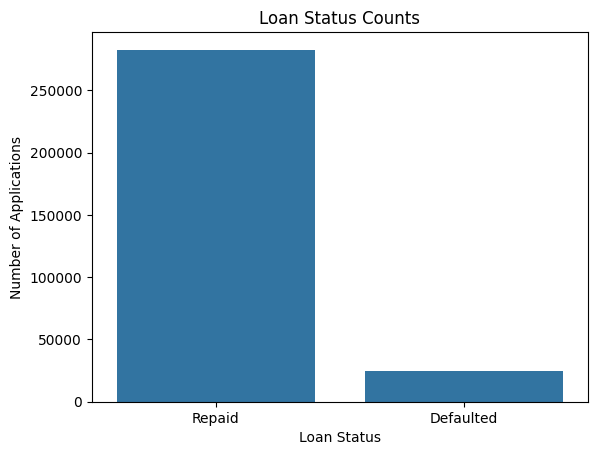

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='TARGET', data=df)
plt.xticks([0, 1], ['Repaid', 'Defaulted'])
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Number of Applications')
plt.show()


In [10]:
Question: What is the distribution of loan types (NAME_CONTRACT_TYPE)? Are cash loans or revolving loans more common?

Analytical Goal: To understand the composition of the loan portfolio (equivalent to Sales by Category).
Key Variables: NAME_CONTRACT_TYPE

SyntaxError: invalid syntax (2221087373.py, line 3)

In [11]:
loan_distribution = df['NAME_CONTRACT_TYPE'].value_counts()
print(loan_distribution)


NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


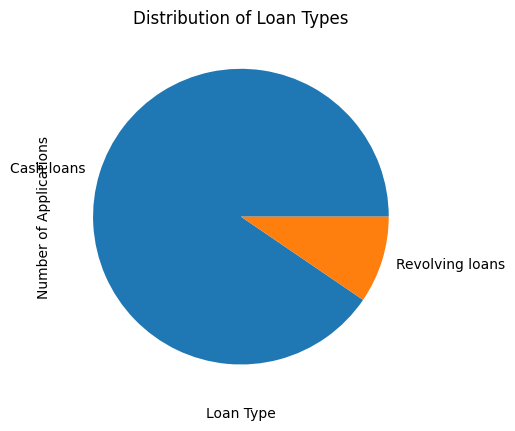

In [12]:
import matplotlib.pyplot as plt

loan_distribution.plot(kind='pie')
plt.title('Distribution of Loan Types')
plt.xlabel('Loan Type')
plt.ylabel('Number of Applications')
plt.xticks(rotation=0)
plt.show()

In [ ]:
5...Question: How does the default rate differ between Cash loans and Revolving loans?

Analytical Goal: To see if one type of loan product is inherently riskier than another (equivalent to Profit by Category).
Key Variables: NAME_CONTRACT_TYPE, TARGET

In [13]:
default_rate_by_type = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().reset_index()
default_rate_by_type = default_rate_by_type.rename(columns={'TARGET': 'Default_Rate'})
print(default_rate_by_type)


  NAME_CONTRACT_TYPE  Default_Rate
0         Cash loans      0.083459
1    Revolving loans      0.054783


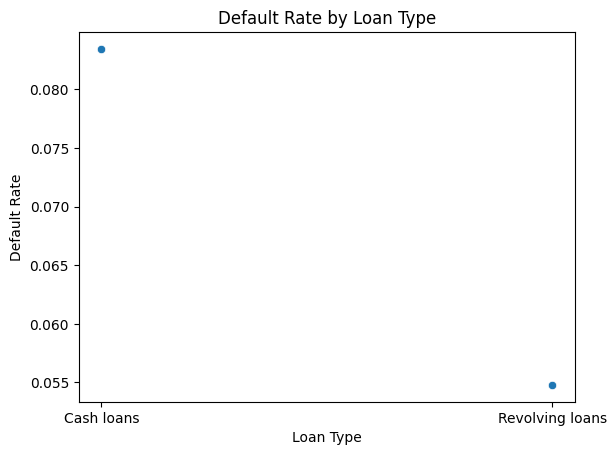

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=default_rate_by_type,
    x='NAME_CONTRACT_TYPE',
    y='Default_Rate'
)
plt.title('Default Rate by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Default Rate')
plt.show()


In [ ]:
6..Question: What is the distribution of applicants by gender?

Analytical Goal: A basic demographic breakdown of the applicant pool (equivalent to Sales by Segment).
Key Variables: CODE_GENDER

In [21]:
gender_distribution = df['CODE_GENDER'].value_counts()
print(gender_distribution)


CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


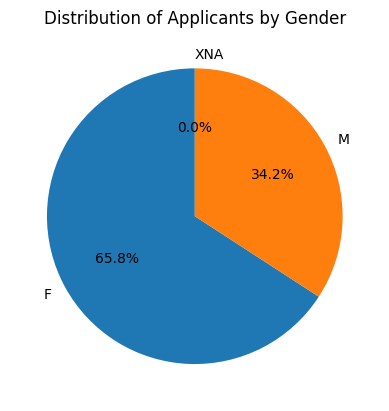

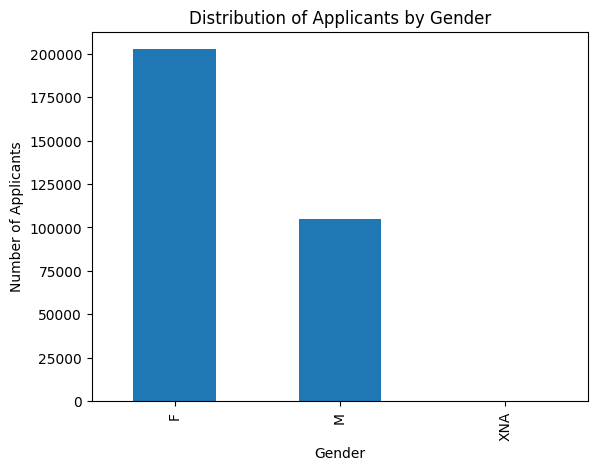

In [24]:
import matplotlib.pyplot as plt

# Pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Applicants by Gender')
plt.ylabel('')
plt.show()

# Or Bar chart
gender_distribution.plot(kind='bar')
plt.title('Distribution of Applicants by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.show()


In [ ]:

7....Question: Does the default rate vary significantly between male and female applicants?

Analytical Goal: To check for risk disparity across genders.
Key Variables: CODE_GENDER, TARGET

In [25]:
default_rate_by_gender = df.groupby('CODE_GENDER')['TARGET'].agg(['mean', 'count']).reset_index()
default_rate_by_gender = default_rate_by_gender.rename(columns={'mean': 'Default_Rate', 'count': 'Count_Applications'})
print(default_rate_by_gender)


  CODE_GENDER  Default_Rate  Count_Applications
0           F      0.069993              202448
1           M      0.101419              105059
2         XNA      0.000000                   4


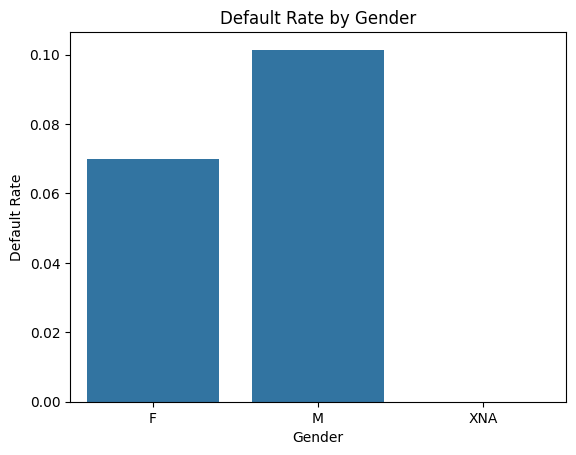

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=default_rate_by_gender,
    x='CODE_GENDER',
    y='Default_Rate'
)
plt.title('Default Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Default Rate')
plt.show()


In [ ]:

8..Question: What is the age distribution of all applicants?

Analytical Goal: To understand the age profile of the customer base.
Key Variables: DAYS_BIRTH

count    307511.000000
mean         43.936992
std          11.956084
min          20.500000
25%          34.000000
50%          43.200000
75%          53.900000
max          69.100000
Name: AGE_YEARS, dtype: float64


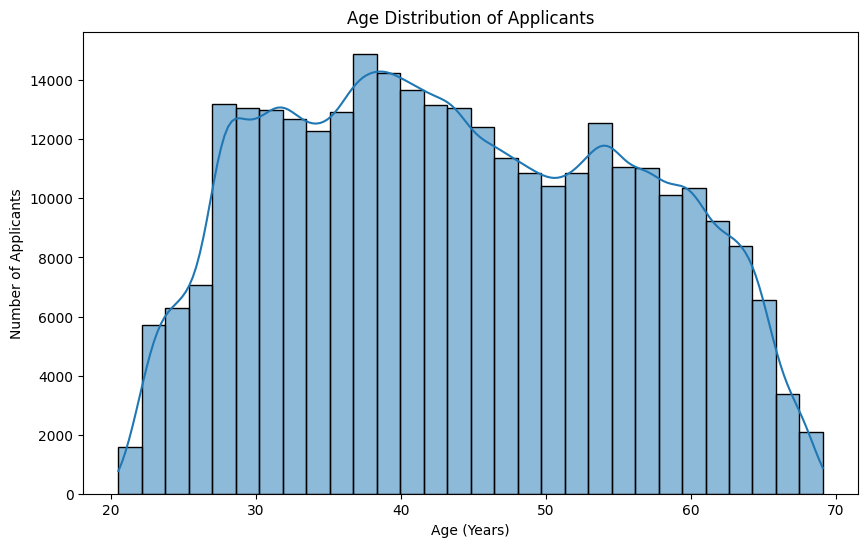

In [35]:
# Convert to positive age in years
df['AGE_YEARS'] = (-df['DAYS_BIRTH'] / 365).round(1)

# Check the distribution
print(df['AGE_YEARS'].describe())

# Plot it
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['AGE_YEARS'], bins=30, kde=True)
plt.title('Age Distribution of Applicants')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Applicants')
plt.show()


In [ ]:
9...Question: How does the default rate trend across different age groups (e.g., 20-30, 30-40, etc.)?

Analytical Goal: To identify if age is a significant risk factor.
Key Variables: DAYS_BIRTH, TARGET

In [36]:
import pandas as pd
df['AGE_YEARS'] = (-df['DAYS_BIRTH'] / 365).round(1)


bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['AGE_GROUP'] = pd.cut(df['AGE_YEARS'], bins=bins, labels=labels, right=False)


default_rate_by_age = df.groupby('AGE_GROUP')['TARGET'].mean().reset_index()
default_rate_by_age = default_rate_by_age.rename(columns={'TARGET': 'Default_Rate'})
print(default_rate_by_age)


  AGE_GROUP  Default_Rate
0     20-30      0.114717
1     30-40      0.095841
2     40-50      0.076630
3     50-60      0.061470
4     60-70      0.049203


C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\2588907843.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_age = df.groupby('AGE_GROUP')['TARGET'].mean().reset_index()


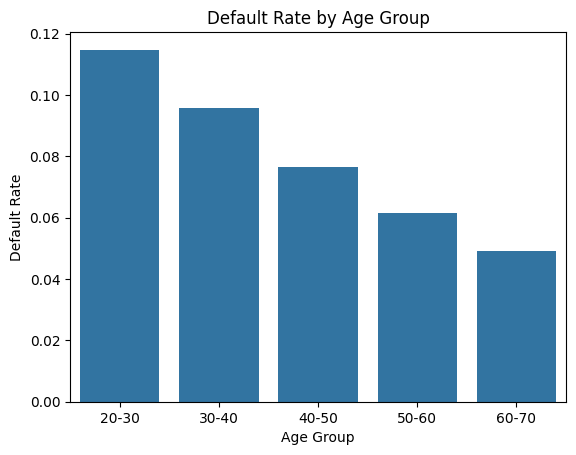

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=default_rate_by_age, x='AGE_GROUP', y='Default_Rate')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.show()


In [ ]:
10..Question: What is the default rate for different family statuses (NAME_FAMILY_STATUS)?

Analytical Goal: To assess if an applicant's marital or family situation correlates with their repayment behavior.
Key Variables: NAME_FAMILY_STATUS, TARGET

In [40]:
# Calculate default rate by family status
default_rate_by_family = (
    df.groupby('NAME_FAMILY_STATUS')['TARGET']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Default_Rate', 'count': 'Count_Applications'})
)

print(default_rate_by_family)


     NAME_FAMILY_STATUS  Default_Rate  Count_Applications
0        Civil marriage      0.099446               29775
1               Married      0.075599              196432
2             Separated      0.081942               19770
3  Single / not married      0.098077               45444
4               Unknown      0.000000                   2
5                 Widow      0.058242               16088


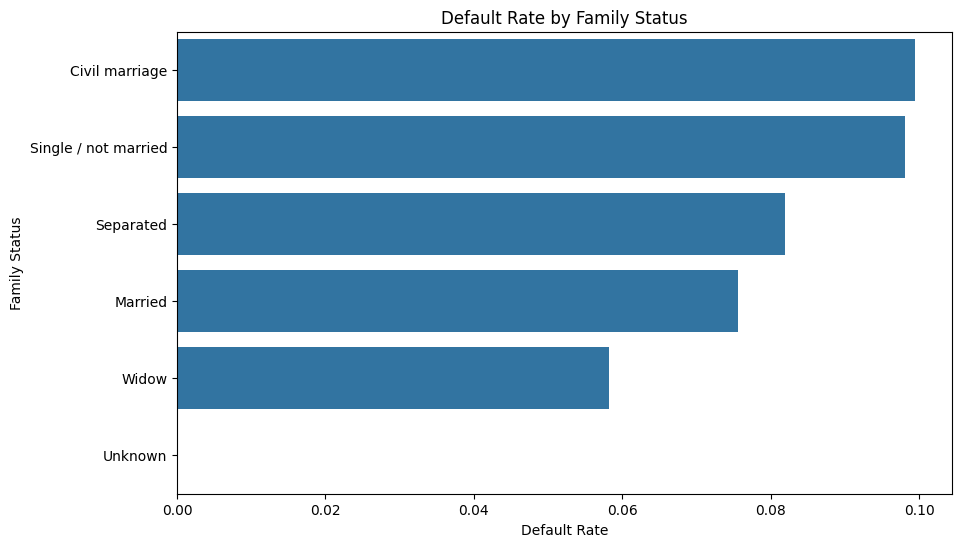

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=default_rate_by_family,
    x='Default_Rate',
    y='NAME_FAMILY_STATUS',
    order=default_rate_by_family.sort_values('Default_Rate', ascending=False)['NAME_FAMILY_STATUS']
)
plt.title('Default Rate by Family Status')
plt.xlabel('Default Rate')
plt.ylabel('Family Status')
plt.show()


In [ ]:
11..Question: How does applicant income (AMT_INCOME_TOTAL) distribution look for those who defaulted versus those who did not?

Analytical Goal: To see if lower income is a strong indicator of default. An overlapping density plot is great for this.
Key Variables: AMT_INCOME_TOTAL, TARGET

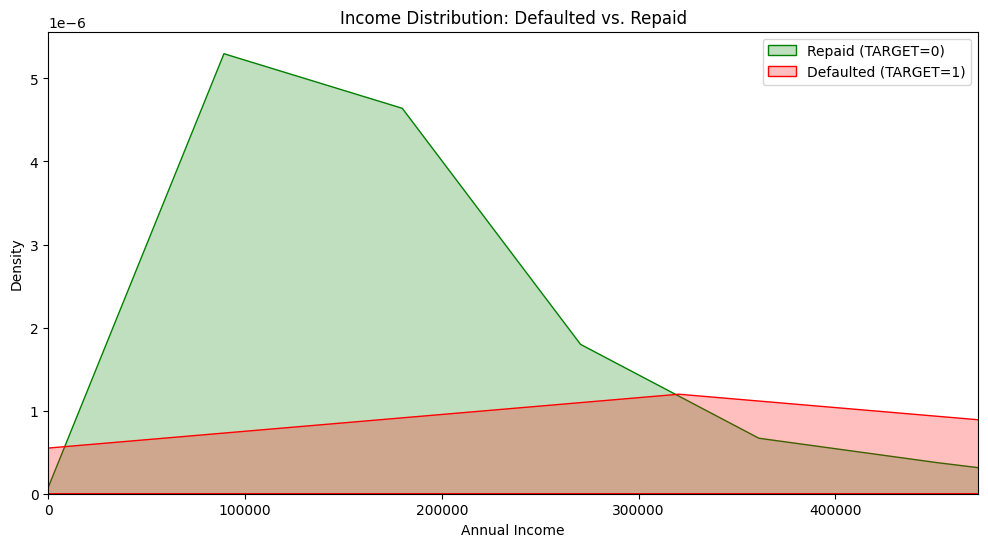

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.kdeplot(
    data=df[df['TARGET'] == 0],
    x='AMT_INCOME_TOTAL',
    fill=True,
    label='Repaid (TARGET=0)',
    color='green',
    common_norm=False
)

sns.kdeplot(
    data=df[df['TARGET'] == 1],
    x='AMT_INCOME_TOTAL',
    fill=True,
    label='Defaulted (TARGET=1)',
    color='red',
    common_norm=False
)

plt.title('Income Distribution: Defaulted vs. Repaid')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, df['AMT_INCOME_TOTAL'].quantile(0.99))  # Limit to exclude extreme outliers
plt.show()


In [ ]:
12..Question: What is the breakdown of applicants by their highest level of education (NAME_EDUCATION_TYPE)?

Analytical Goal: To understand the educational background of the applicant pool.
Key Variables: NAME_EDUCATION_TYPE

In [43]:
education_breakdown = df['NAME_EDUCATION_TYPE'].value_counts().reset_index()
education_breakdown.columns = ['NAME_EDUCATION_TYPE', 'Count_Applicants']
print(education_breakdown)


             NAME_EDUCATION_TYPE  Count_Applicants
0  Secondary / secondary special            218391
1               Higher education             74863
2              Incomplete higher             10277
3                Lower secondary              3816
4                Academic degree               164


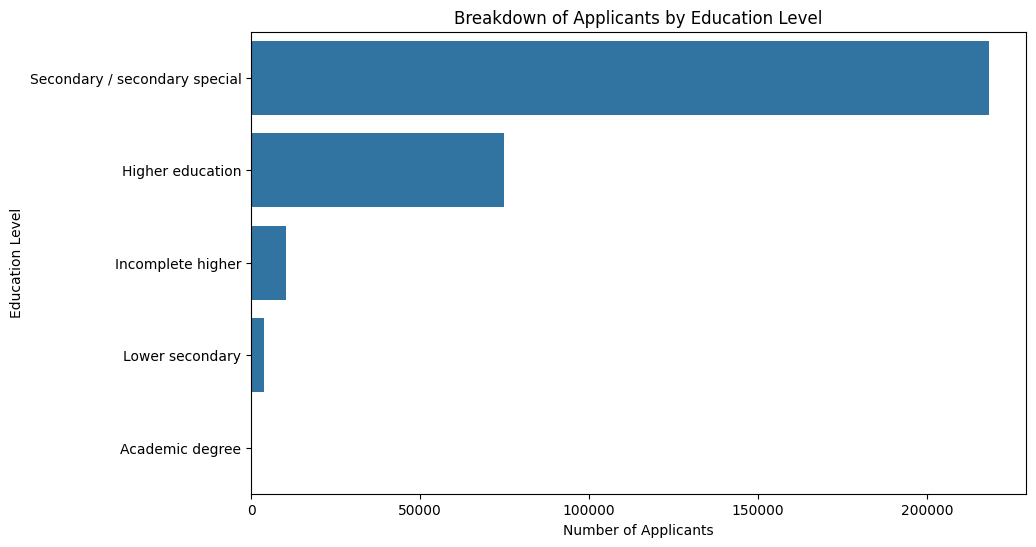

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=education_breakdown,
    y='NAME_EDUCATION_TYPE',
    x='Count_Applicants',
    order=education_breakdown['NAME_EDUCATION_TYPE']
)

plt.title('Breakdown of Applicants by Education Level')
plt.xlabel('Number of Applicants')
plt.ylabel('Education Level')
plt.show()


In [ ]:
13...Question: Is there a correlation between education level and default rate?

Analytical Goal: To determine if higher education leads to lower credit risk.
Key Variables: NAME_EDUCATION_TYPE, TARGET

In [45]:
# Calculate default rate by education level
default_rate_edu = (
    df.groupby('NAME_EDUCATION_TYPE')['TARGET']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Default_Rate', 'count': 'Count_Applications'})
)

print(default_rate_edu)


             NAME_EDUCATION_TYPE  Default_Rate  Count_Applications
0                Academic degree      0.018293                 164
1               Higher education      0.053551               74863
2              Incomplete higher      0.084850               10277
3                Lower secondary      0.109277                3816
4  Secondary / secondary special      0.089399              218391


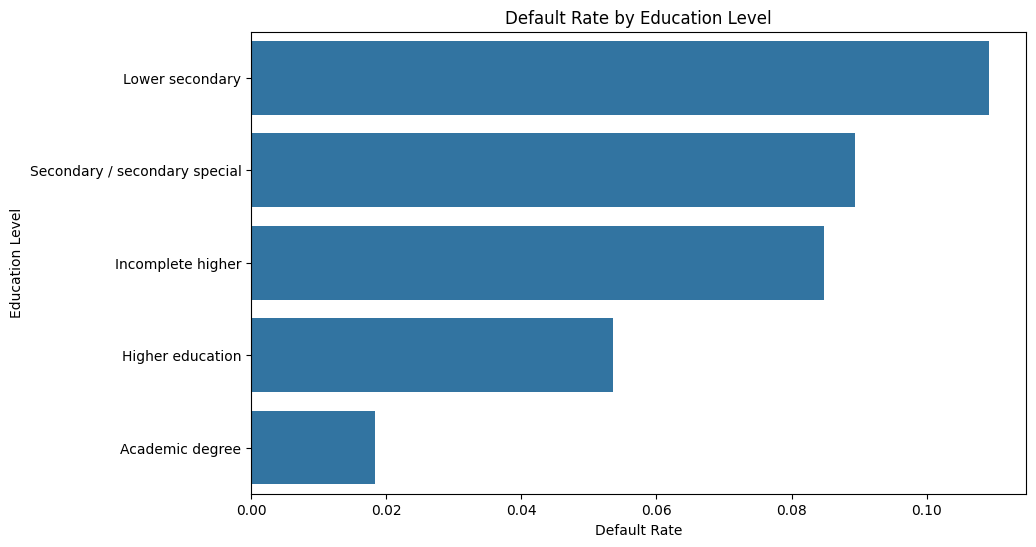

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=default_rate_edu,
    x='Default_Rate',
    y='NAME_EDUCATION_TYPE',
    order=default_rate_edu.sort_values('Default_Rate', ascending=False)['NAME_EDUCATION_TYPE']
)

plt.title('Default Rate by Education Level')
plt.xlabel('Default Rate')
plt.ylabel('Education Level')
plt.show()


In [ ]:
14..Question: What is the default rate for applicants with and without children?

Analytical Goal: To see if the number of dependents impacts repayment ability.
Key Variables: CNT_CHILDREN, TARGET

In [47]:
# Create a new column: Has_Children
df['Has_Children'] = df['CNT_CHILDREN'].apply(lambda x: 'Has Children' if x > 0 else 'No Children')

# Calculate default rate by children status
default_rate_children = (
    df.groupby('Has_Children')['TARGET']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Default_Rate', 'count': 'Count_Applications'})
)

print(default_rate_children)


   Has_Children  Default_Rate  Count_Applications
0  Has Children      0.089169               92140
1   No Children      0.077118              215371


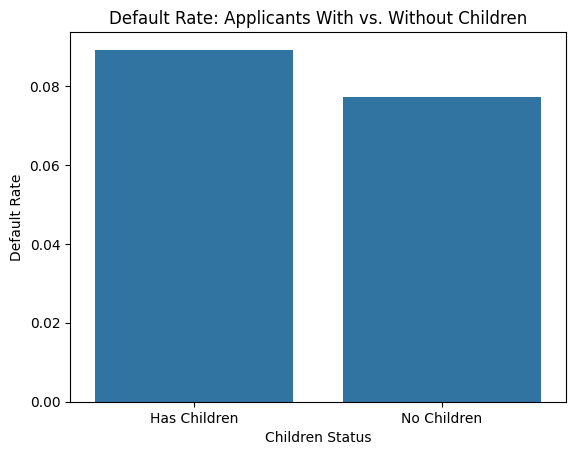

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=default_rate_children,
    x='Has_Children',
    y='Default_Rate'
)

plt.title('Default Rate: Applicants With vs. Without Children')
plt.xlabel('Children Status')
plt.ylabel('Default Rate')
plt.show()


In [ ]:
15..Question: How does the default rate change for applicants who own a car vs. those who don't?

Analytical Goal: To assess if car ownership is a signal of financial stability.
Key Variables: FLAG_OWN_CAR, TARGET

In [49]:
# Calculate default rate by car ownership
default_rate_car = (
    df.groupby('FLAG_OWN_CAR')['TARGET']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Default_Rate', 'count': 'Count_Applications'})
)

print(default_rate_car)


  FLAG_OWN_CAR  Default_Rate  Count_Applications
0            N      0.085002              202924
1            Y      0.072437              104587


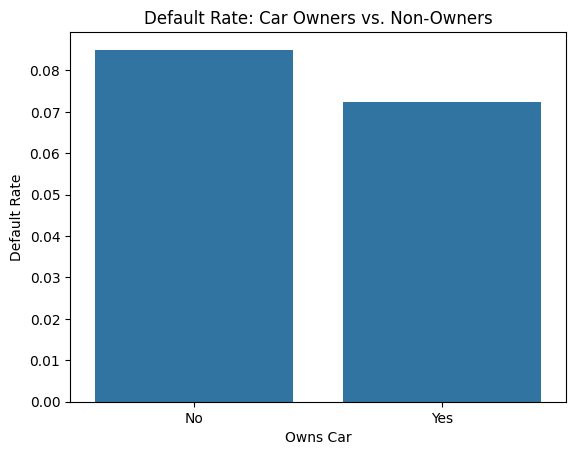

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=default_rate_car,
    x='FLAG_OWN_CAR',
    y='Default_Rate'
)

plt.title('Default Rate: Car Owners vs. Non-Owners')
plt.xlabel('Owns Car')
plt.ylabel('Default Rate')
plt.xticks([0, 1], ['No', 'Yes'])  # Optional: map 'N'/'Y' to labels if you want
plt.show()


In [ ]:
16..Question: Similarly, how does the default rate change for applicants who own real estate vs. those who don't?

Analytical Goal: To check if property ownership is a significant factor in reducing risk.
Key Variables: FLAG_OWN_REALTY, TARGET

In [51]:
default_rate_car = (
    df.groupby('FLAG_OWN_CAR')['TARGET']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Default_Rate', 'count': 'Count_Applicants'})
)

print(default_rate_car)


  FLAG_OWN_CAR  Default_Rate  Count_Applicants
0            N      0.085002            202924
1            Y      0.072437            104587


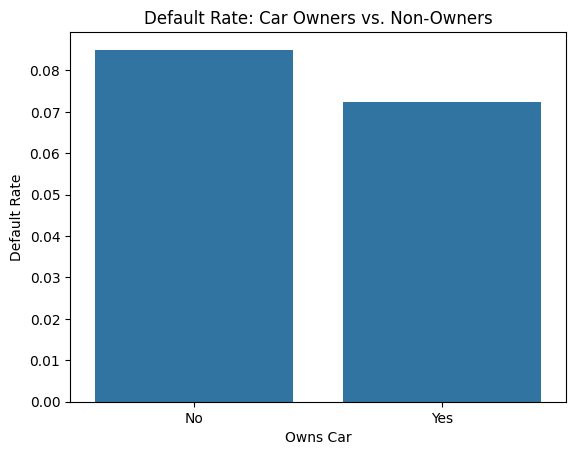

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=default_rate_car,
    x='FLAG_OWN_CAR',
    y='Default_Rate'
)

plt.title('Default Rate: Car Owners vs. Non-Owners')
plt.xlabel('Owns Car')
plt.ylabel('Default Rate')
plt.xticks([0, 1], ['No', 'Yes'])  # Optional: prettier labels
plt.show()


In [ ]:
17..Question: What are the most common housing types (NAME_HOUSING_TYPE) for applicants, and what are their associated default rates?

Analytical Goal: To understand if living situations (renting, living with parents) correlate with risk.
Key Variables: NAME_HOUSING_TYPE, TARGET

In [53]:
# Group by housing type
housing_stats = (
    df.groupby('NAME_HOUSING_TYPE')['TARGET']
    .agg(['count', 'mean'])
    .reset_index()
    .rename(columns={'count': 'Count_Applicants', 'mean': 'Default_Rate'})
)

print(housing_stats)


     NAME_HOUSING_TYPE  Count_Applicants  Default_Rate
0      Co-op apartment              1122      0.079323
1    House / apartment            272868      0.077957
2  Municipal apartment             11183      0.085397
3     Office apartment              2617      0.065724
4     Rented apartment              4881      0.123131
5         With parents             14840      0.116981


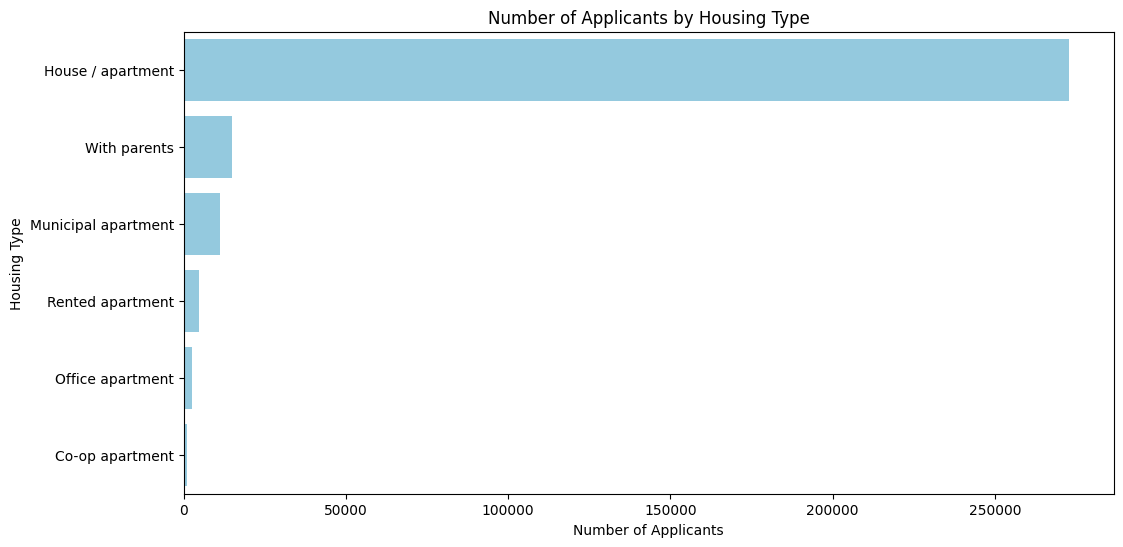

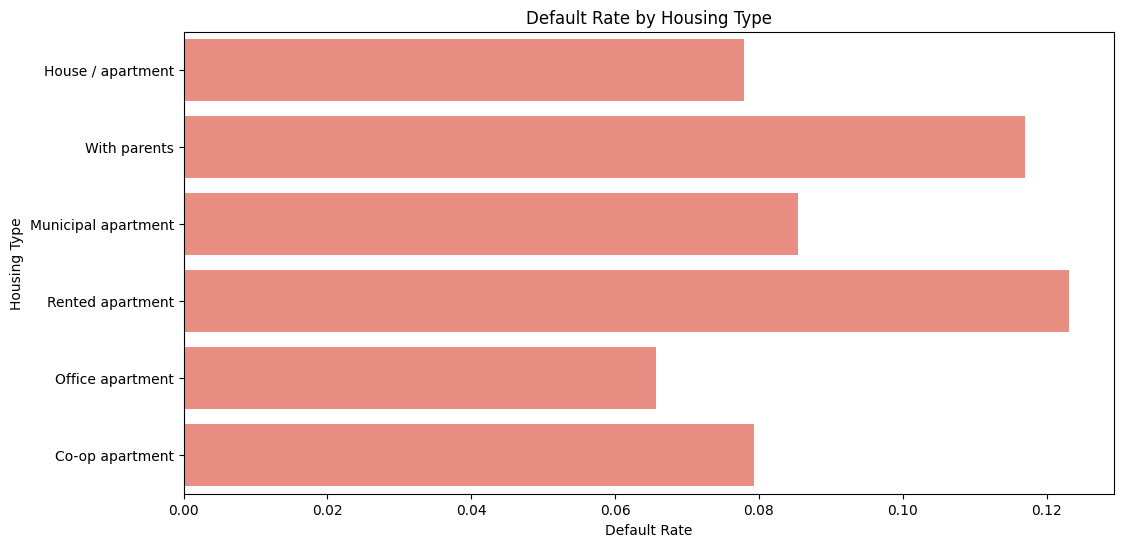

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by number of applicants
housing_stats = housing_stats.sort_values('Count_Applicants', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=housing_stats,
    y='NAME_HOUSING_TYPE',
    x='Count_Applicants',
    color='skyblue'
)
plt.title('Number of Applicants by Housing Type')
plt.xlabel('Number of Applicants')
plt.ylabel('Housing Type')
plt.show()

# Plot default rate as well
plt.figure(figsize=(12, 6))
sns.barplot(
    data=housing_stats,
    y='NAME_HOUSING_TYPE',
    x='Default_Rate',
    color='salmon'
)
plt.title('Default Rate by Housing Type')
plt.xlabel('Default Rate')
plt.ylabel('Housing Type')
plt.show()


In [ ]:
18..Question: What is the distribution of loan amounts (AMT_CREDIT)?

Analytical Goal: To understand the typical size of loans being requested.
Key Variables: AMT_CREDIT

In [55]:
# Summary statistics
print(df['AMT_CREDIT'].describe())

# Output includes:
# count, mean, std, min, 25%, 50% (median), 75%, max


count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


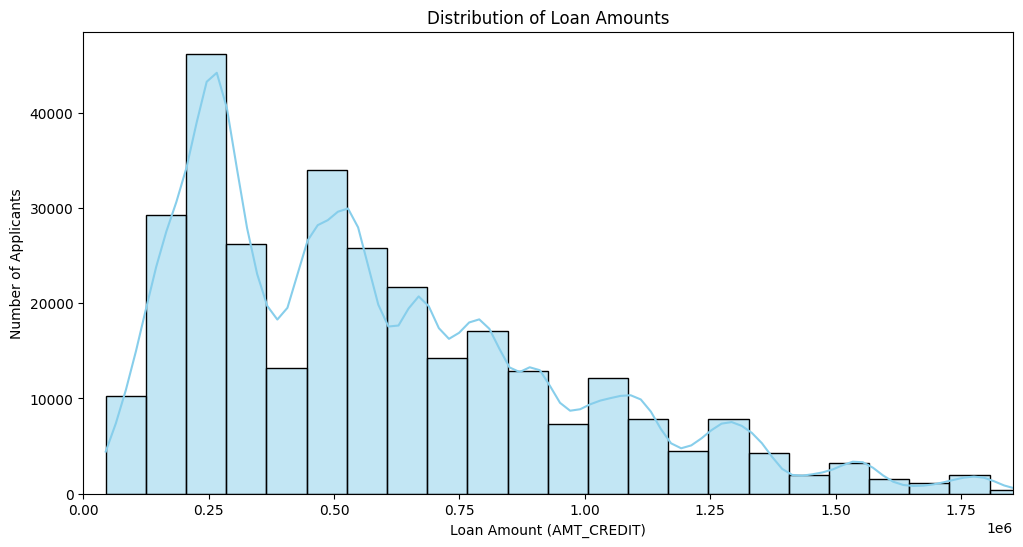

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.histplot(
    df['AMT_CREDIT'],
    bins=50,
    kde=True,
    color='skyblue'
)

plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount (AMT_CREDIT)')
plt.ylabel('Number of Applicants')
plt.xlim(0, df['AMT_CREDIT'].quantile(0.99))  # Optional: exclude extreme outliers for clarity
plt.show()


In [ ]:
19...Question: Is there a relationship between the loan amount (AMT_CREDIT) and the price of the goods the loan is for (AMT_GOODS_PRICE)?

Analytical Goal: To check for consistency and identify loans that are much larger than the asset price (potential risk).
Key Variables: AMT_CREDIT, AMT_GOODS_PRICE

In [57]:
# Create the ratio
df['CREDIT_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']

# Basic stats
print(df['CREDIT_GOODS_RATIO'].describe())

# Optional: Look at outliers
outliers = df[df['CREDIT_GOODS_RATIO'] > 1.2]
print(outliers[['AMT_CREDIT', 'AMT_GOODS_PRICE', 'CREDIT_GOODS_RATIO']].head())


count    307233.000000
mean          1.122995
std           0.124045
min           0.150000
25%           1.000000
50%           1.118800
75%           1.198000
max           6.000000
Name: CREDIT_GOODS_RATIO, dtype: float64
    AMT_CREDIT  AMT_GOODS_PRICE  CREDIT_GOODS_RATIO
13    918468.0         697500.0            1.316800
15    299772.0         247500.0            1.211200
16    509602.5         387000.0            1.316802
21   1132573.5         927000.0            1.221762
26    979992.0         702000.0            1.396000


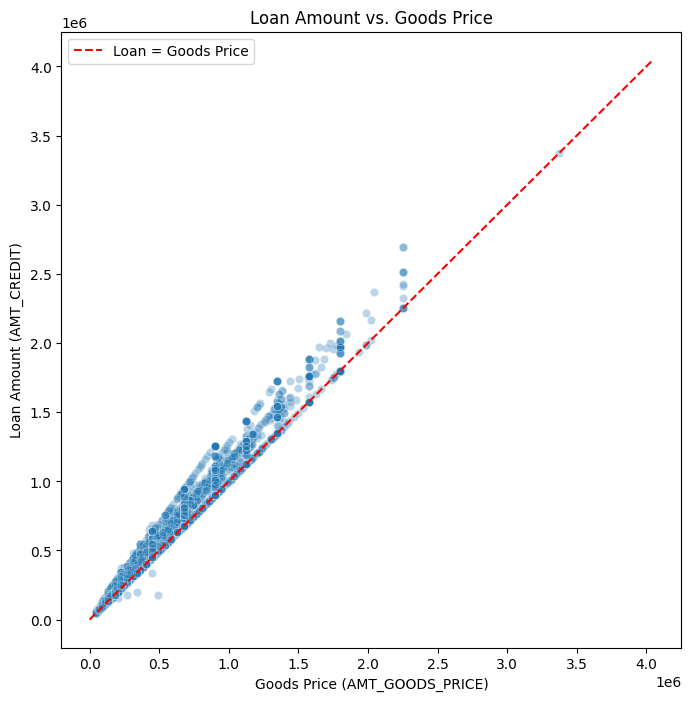

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=df.sample(5000),  # use a sample for faster plotting
    x='AMT_GOODS_PRICE',
    y='AMT_CREDIT',
    alpha=0.3
)

# Add a reference line where loan = goods price
max_val = max(df['AMT_GOODS_PRICE'].max(), df['AMT_CREDIT'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Loan = Goods Price')

plt.title('Loan Amount vs. Goods Price')
plt.xlabel('Goods Price (AMT_GOODS_PRICE)')
plt.ylabel('Loan Amount (AMT_CREDIT)')
plt.legend()
plt.show()


In [ ]:
20...Question: What are the most common income types (NAME_INCOME_TYPE) for applicants?

Analytical Goal: To segment applicants by their source of income (e.g., Working, Pensioner).
Key Variables: NAME_INCOME_TYP

In [59]:
# Count of each income type
income_type_counts = df['NAME_INCOME_TYPE'].value_counts()

# Display the result
print(income_type_counts)


NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


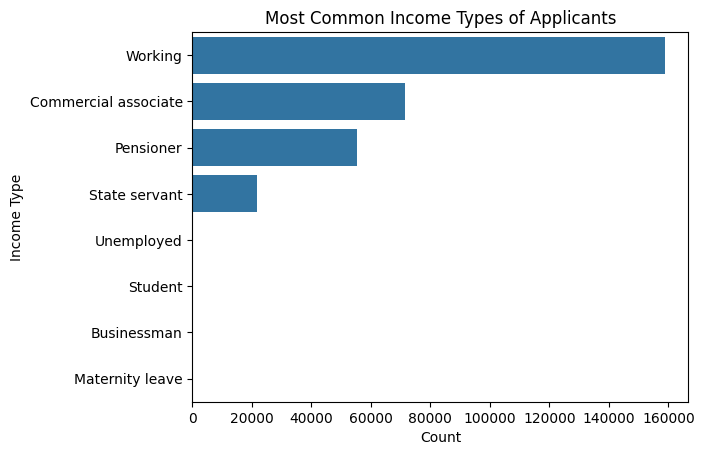

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, y='NAME_INCOME_TYPE', order=df['NAME_INCOME_TYPE'].value_counts().index)
plt.title('Most Common Income Types of Applicants')
plt.xlabel('Count')
plt.ylabel('Income Type')
plt.show()


In [ ]:
21..Question: Which income types have the highest and lowest default rates?

Analytical Goal: To identify the riskiest employment segments (e.g., are pensioners more or less risky than state servants?).
Key Variables: NAME_INCOME_TYPE, TARGET

In [61]:
# Group by income type and calculate default rate (mean of TARGET)
default_rates = df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False)

# Display result
print(default_rates)


NAME_INCOME_TYPE
Maternity leave         0.400000
Unemployed              0.363636
Working                 0.095885
Commercial associate    0.074843
State servant           0.057550
Pensioner               0.053864
Businessman             0.000000
Student                 0.000000
Name: TARGET, dtype: float64


C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\1666592480.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_rates_df, x='TARGET', y='NAME_INCOME_TYPE', palette='coolwarm')


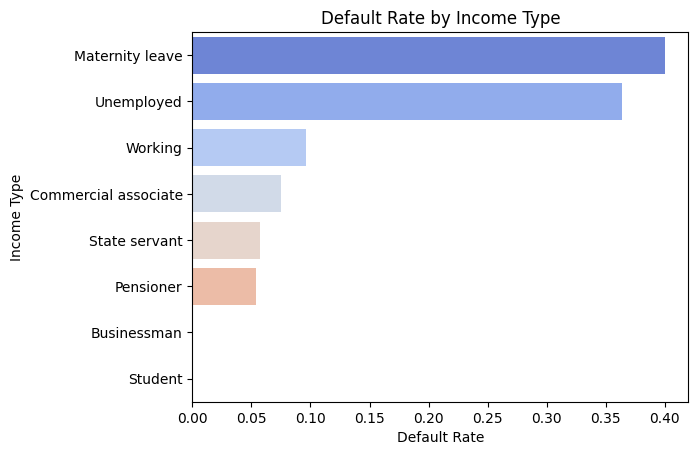

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert series to DataFrame for plotting
default_rates_df = default_rates.reset_index()

sns.barplot(data=default_rates_df, x='TARGET', y='NAME_INCOME_TYPE', palette='coolwarm')
plt.xlabel('Default Rate')
plt.ylabel('Income Type')
plt.title('Default Rate by Income Type')
plt.show()


In [ ]:
22..Question: What is the distribution of the "Credit to Income Ratio" (AMT_CREDIT / AMT_INCOME_TOTAL)?

Analytical Goal: To analyze how leveraged applicants are. This is a powerful risk indicator (equivalent to the Impact of Discount).
Key Variables: AMT_CREDIT, AMT_INCOME_TOTAL

In [63]:
# Create a new column for Credit to Income Ratio
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
# Filter out extreme ratios (e.g., those above 10)
df_filtered = df[df['CREDIT_INCOME_RATIO'] < 10]


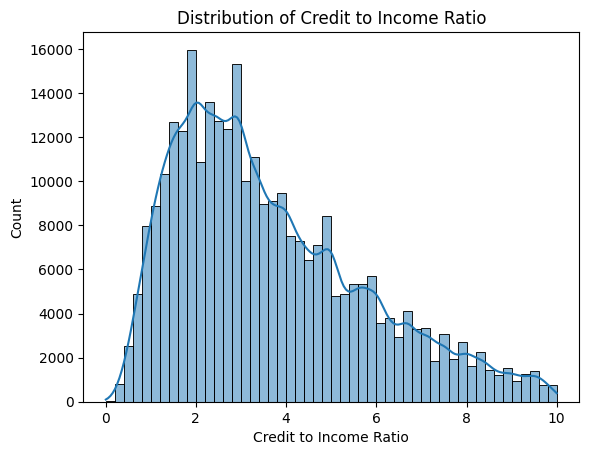

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution
sns.histplot(df_filtered['CREDIT_INCOME_RATIO'], bins=50, kde=True)
plt.xlabel('Credit to Income Ratio')
plt.title('Distribution of Credit to Income Ratio')
plt.show()


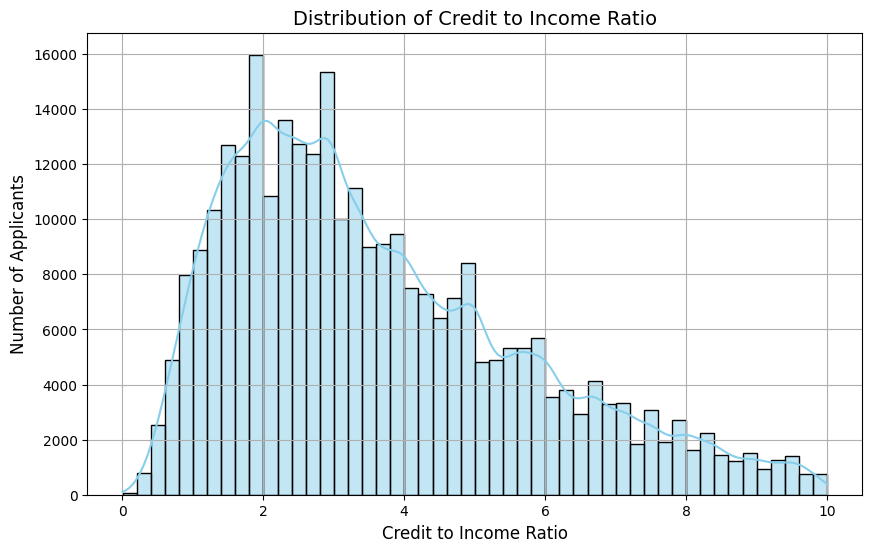

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the Credit to Income Ratio column
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

# Step 2: Remove extreme outliers for better visualization (e.g., keep ratio < 10)
df_filtered = df[df['CREDIT_INCOME_RATIO'] < 10]

# Step 3: Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['CREDIT_INCOME_RATIO'], bins=50, kde=True, color='skyblue')
plt.xlabel('Credit to Income Ratio', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.title('Distribution of Credit to Income Ratio', fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
23..Question: How does the default rate change as the "Credit to Income Ratio" increases?

Analytical Goal: To confirm the hypothesis that highly leveraged clients are more likely to default.
Key Variables: AMT_CREDIT, AMT_INCOME_TOTAL, TARGET

C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\2572776493.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['RATIO_BIN'] = pd.cut(df_filtered['CREDIT_INCOME_RATIO'], bins=[0, 0.5, 1, 2, 3, 5, 10])
C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\2572776493.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df_filtered.groupby('RATIO_BIN')['TARGET'].mean()


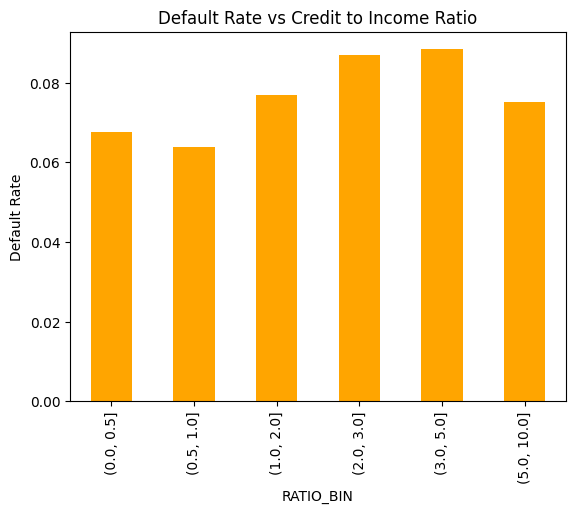

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Create Credit to Income Ratio
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

# Remove very large ratios for better plot
df_filtered = df[df['CREDIT_INCOME_RATIO'] < 10]

# Create bins
df_filtered['RATIO_BIN'] = pd.cut(df_filtered['CREDIT_INCOME_RATIO'], bins=[0, 0.5, 1, 2, 3, 5, 10])

# Calculate default rate for each bin
default_rates = df_filtered.groupby('RATIO_BIN')['TARGET'].mean()
default_rates.plot(kind='bar', color='orange')
plt.ylabel('Default Rate')
plt.title('Default Rate vs Credit to Income Ratio')
plt.show()

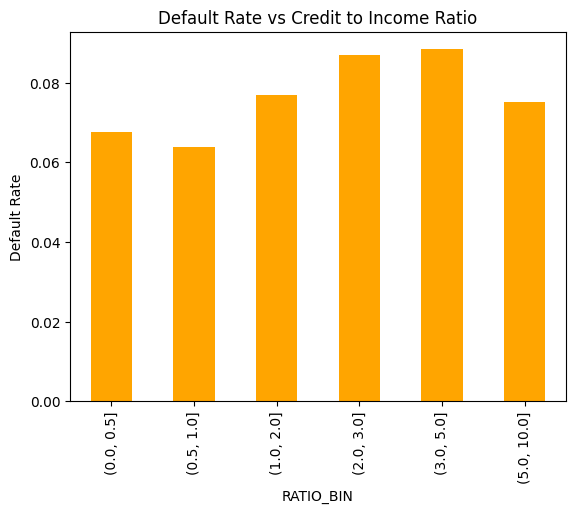

In [67]:
default_rates.plot(kind='bar', color='orange')
plt.ylabel('Default Rate')
plt.title('Default Rate vs Credit to Income Ratio')
plt.show()

In [ ]:
24..Question: What is the distribution of employment duration (DAYS_EMPLOYED) for applicants?

Analytical Goal: To see if the applicant pool consists of people with stable jobs or recent hires.
Key Variables: DAYS_EMPLOYED

In [69]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Remove placeholder values (e.g., 365243)
df_filtered = df[df['DAYS_EMPLOYED'] != 365243]

# Step 2: Convert to positive values (optional, for clarity)
df_filtered['DAYS_EMPLOYED_POS'] = -df_filtered['DAYS_EMPLOYED']

C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\2550864771.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DAYS_EMPLOYED_POS'] = -df_filtered['DAYS_EMPLOYED']


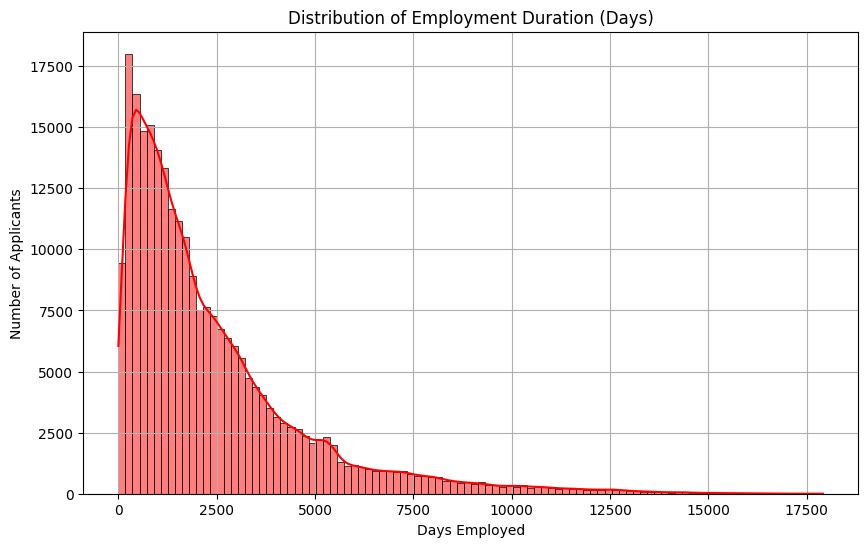

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['DAYS_EMPLOYED_POS'], bins=100, kde=True, color='red')
plt.xlabel('Days Employed')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Employment Duration (Days)')
plt.grid(True)
plt.show()

In [ ]:
25..Question: Does a longer employment history correlate with a lower default rate?

Analytical Goal: To validate if job stability is a good indicator of creditworthiness.
Key Variables: DAYS_EMPLOYED, TARGET

C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\3660344257.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365
C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\3660344257.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['EMPLOYMENT_BIN'] = pd.cut(df_filtered['YEARS_EMPLOYED'],
C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\3660344257.py:16: FutureWarning: The default of observed=False is deprecated and will be changed 

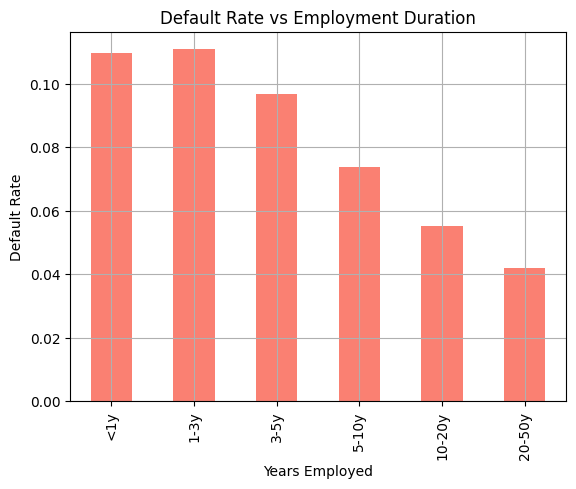

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Remove placeholder value
df_filtered = df[df['DAYS_EMPLOYED'] != 365243]

# Step 2: Convert to positive years
df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365

# Step 3: Bin years of employment
df_filtered['EMPLOYMENT_BIN'] = pd.cut(df_filtered['YEARS_EMPLOYED'], 
                                        bins=[0, 1, 3, 5, 10, 20, 50], 
                                        labels=['<1y', '1-3y', '3-5y', '5-10y', '10-20y', '20-50y'])

# Step 4: Calculate default rate per bin
default_rates = df_filtered.groupby('EMPLOYMENT_BIN')['TARGET'].mean()

# Step 5: Plot
default_rates.plot(kind='bar', color='salmon')
plt.title('Default Rate vs Employment Duration')
plt.xlabel('Years Employed')
plt.ylabel('Default Rate')
plt.grid(True)
plt.show()


In [ ]:
26...Question: Which organization types (ORGANIZATION_TYPE) have the most applicants?

Analytical Goal: To understand which industries or sectors our customers work in.
Key Variables: ORGANIZATION_TYPE

In [74]:
# Count of applicants per organization type
org_counts = df['ORGANIZATION_TYPE'].value_counts()

# Display the result
print(org_counts)


ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

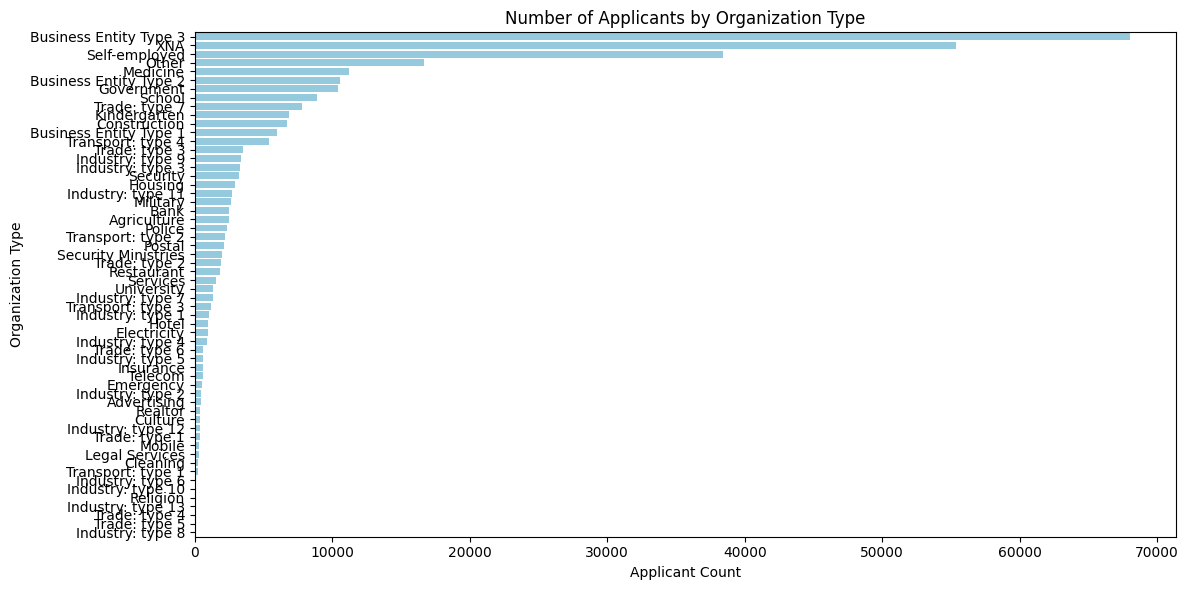

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='ORGANIZATION_TYPE', 
              order=df['ORGANIZATION_TYPE'].value_counts().index, 
              color='skyblue')
plt.title('Number of Applicants by Organization Type')
plt.xlabel('Applicant Count')
plt.ylabel('Organization Type')
plt.tight_layout()
plt.show()


In [ ]:
27...Question: Which organization types have the highest and lowest default rates?

Analytical Goal: To perform risk assessment at an industry level (equivalent to Profit by Sub-Category).
Key Variables: ORGANIZATION_TYPE, TARGET

In [76]:
# Group by organization type and calculate default rate
default_rates = df.groupby('ORGANIZATION_TYPE')['TARGET'].mean().sort_values(ascending=False)

# Display result
print(default_rates)


ORGANIZATION_TYPE
Transport: type 3         0.157540
Industry: type 13         0.134328
Industry: type 8          0.125000
Restaurant                0.117062
Construction              0.116798
Cleaning                  0.111538
Industry: type 1          0.110683
Industry: type 3          0.106162
Realtor                   0.106061
Agriculture               0.104727
Trade: type 3             0.103379
Self-employed             0.101739
Industry: type 4          0.101482
Security                  0.099784
Trade: type 7             0.094496
Business Entity Type 3    0.092996
Transport: type 4         0.092812
Mobile                    0.091483
Trade: type 1             0.089080
Industry: type 11         0.086538
Business Entity Type 2    0.085284
Postal                    0.084376
Advertising               0.081585
Business Entity Type 1    0.081384
Industry: type 7          0.080337
Housing                   0.079446
Legal Services            0.078689
Transport: type 2         0.078040
Ot

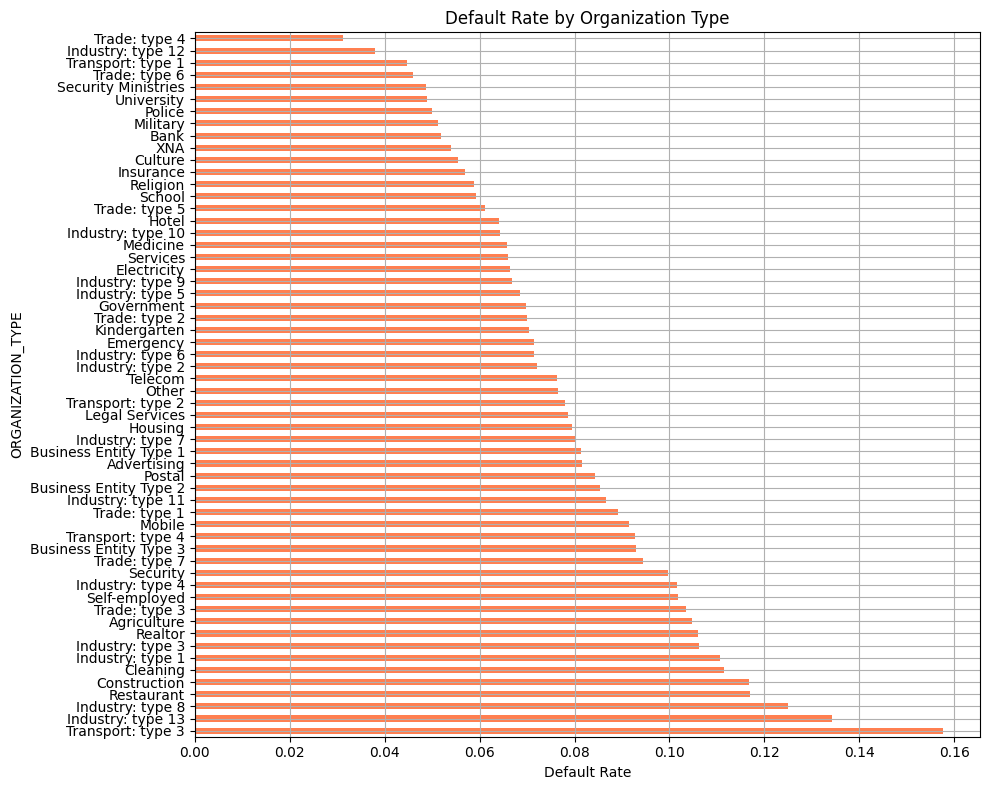

In [77]:
import matplotlib.pyplot as plt

# Plot default rates by organization type
default_rates.plot(kind='barh', figsize=(10, 8), color='coral')
plt.xlabel('Default Rate')
plt.title('Default Rate by Organization Type')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
28...Question: How do the three external source scores (EXT_SOURCE_1, 2, 3) correlate with each other?

Analytical Goal: To understand the redundancy and relationship between these key predictive features. A correlation heatmap is perfect here.
Key Variables: EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3


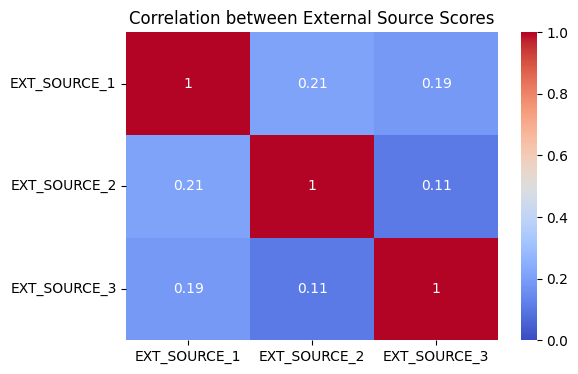

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only the external source columns
ext_sources = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]

# Step 2: Compute correlation matrix
corr_matrix = ext_sources.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation between External Source Scores')
plt.show()


In [ ]:
29..Question: What is the distribution of each EXT_SOURCE score for applicants who defaulted vs. those who did not?

Analytical Goal: To visually confirm that lower external scores are associated with higher default risk.
Key Variables: EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, TARGET

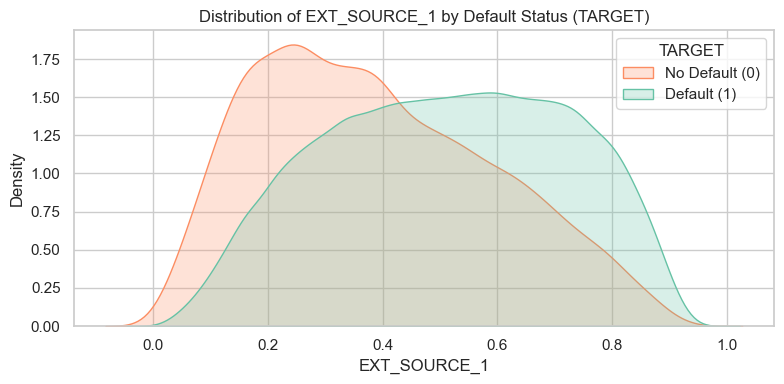

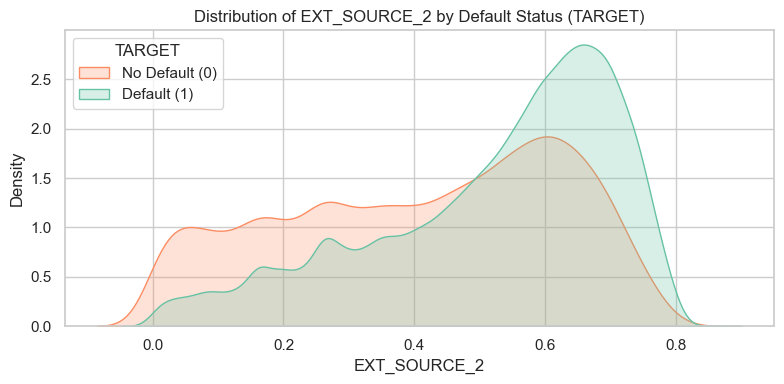

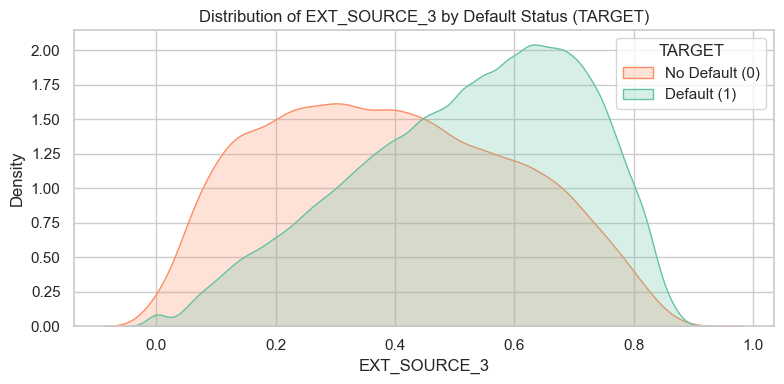

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Plot distributions for each EXT_SOURCE variable
for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, hue='TARGET', common_norm=False, fill=True, palette='Set2')
    plt.title(f'Distribution of {col} by Default Status (TARGET)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='TARGET', labels=['No Default (0)', 'Default (1)'])
    plt.tight_layout()
    plt.show()


In [ ]:
30..Question: What is the relationship between applicant Age and EXT_SOURCE_1?

Analytical Goal: To see if external scoring models are heavily influenced by age.
Key Variables: DAYS_BIRTH, EXT_SOURCE_1

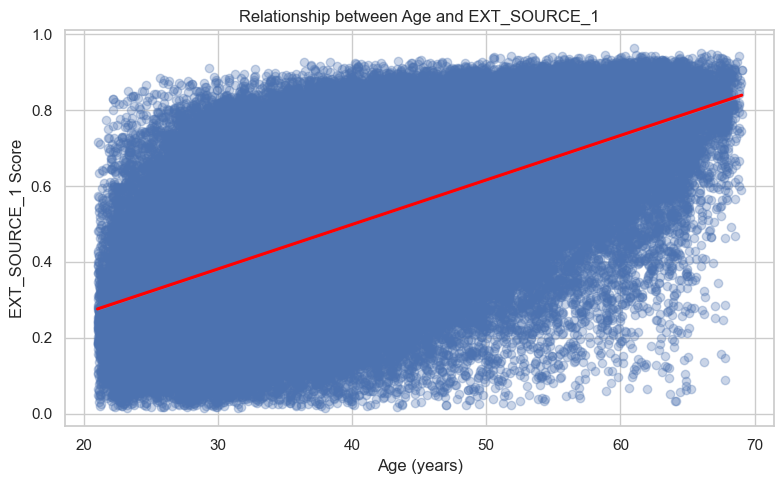

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert DAYS_BIRTH to age in years (make positive)
df['AGE_YEARS'] = -df['DAYS_BIRTH'] / 365

# Step 2: Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='AGE_YEARS', y='EXT_SOURCE_1', scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('Relationship between Age and EXT_SOURCE_1')
plt.xlabel('Age (years)')
plt.ylabel('EXT_SOURCE_1 Score')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
31..Question: How many documents (FLAG_DOCUMENT_...) are typically submitted by applicants?

Analytical Goal: To understand the completeness of applications.
Key Variables: All FLAG_DOCUMENT_... columns.

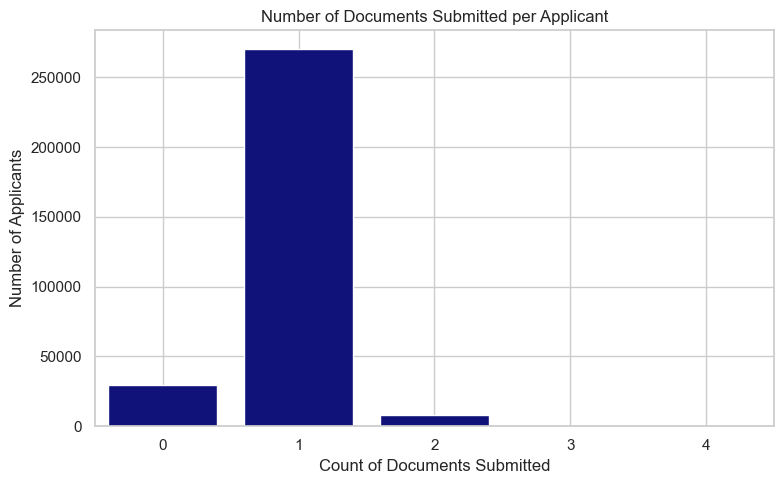

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select all FLAG_DOCUMENT columns
doc_cols = [col for col in df.columns if col.startswith('FLAG_DOCUMENT_')]

# Step 2: Count how many documents each applicant submitted (value = 1)
df['NUM_DOCUMENTS_SUBMITTED'] = df[doc_cols].sum(axis=1)

# Step 3: Plot distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='NUM_DOCUMENTS_SUBMITTED', data=df, color='darkblue')
plt.title('Number of Documents Submitted per Applicant')
plt.xlabel('Count of Documents Submitted')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
32...Question: Is there a correlation between providing a specific document (e.g., FLAG_DOCUMENT_3) and the default rate?

Analytical Goal: To see if the presence or absence of certain documents is a risk indicator.
Key Variables: FLAG_DOCUMENT_3, TARGET

In [84]:
# Group by whether the document was submitted (0 or 1)
doc3_default_rate = df.groupby('FLAG_DOCUMENT_3')['TARGET'].mean()

# Display result
print(doc3_default_rate)


FLAG_DOCUMENT_3
0    0.061825
1    0.088449
Name: TARGET, dtype: float64


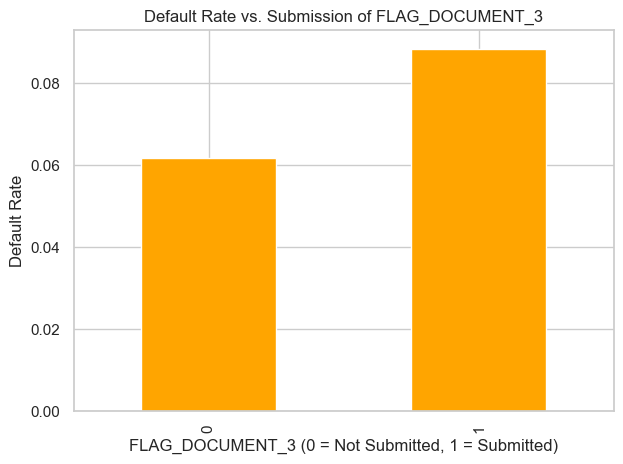

In [85]:
import matplotlib.pyplot as plt

doc3_default_rate.plot(kind='bar', color='orange')
plt.title('Default Rate vs. Submission of FLAG_DOCUMENT_3')
plt.xlabel('FLAG_DOCUMENT_3 (0 = Not Submitted, 1 = Submitted)')
plt.ylabel('Default Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
33..Question: How does the default rate vary based on the number of credit bureau inquiries in the last year?

Analytical Goal: To test the hypothesis that many recent credit inquiries signal financial distress and higher risk.
Key Variables: AMT_REQ_CREDIT_BUREAU_YEAR, TARGET

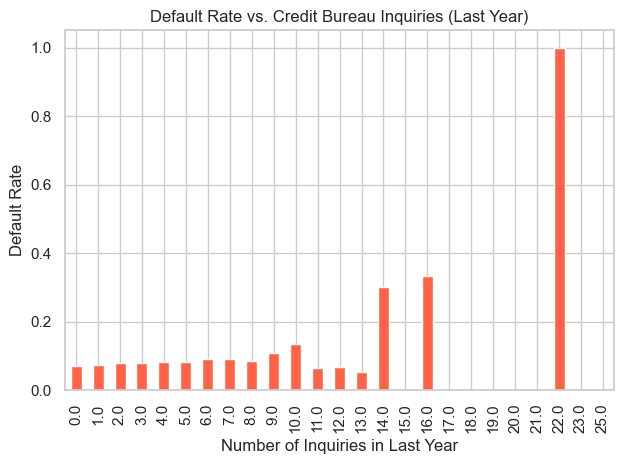

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group by number of inquiries and calculate default rate
inquiry_default_rate = df.groupby('AMT_REQ_CREDIT_BUREAU_YEAR')['TARGET'].mean()

# Step 2: Plot
inquiry_default_rate.plot(kind='bar', color='tomato')
plt.title('Default Rate vs. Credit Bureau Inquiries (Last Year)')
plt.xlabel('Number of Inquiries in Last Year')
plt.ylabel('Default Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
34..Question: How does the "Credit to Income Ratio" distribution vary across different education levels?

Analytical Goal: To see if people with higher education take on more or less relative debt.
Key Variables: NAME_EDUCATION_TYPE, AMT_CREDIT, AMT_INCOME_TOTAL

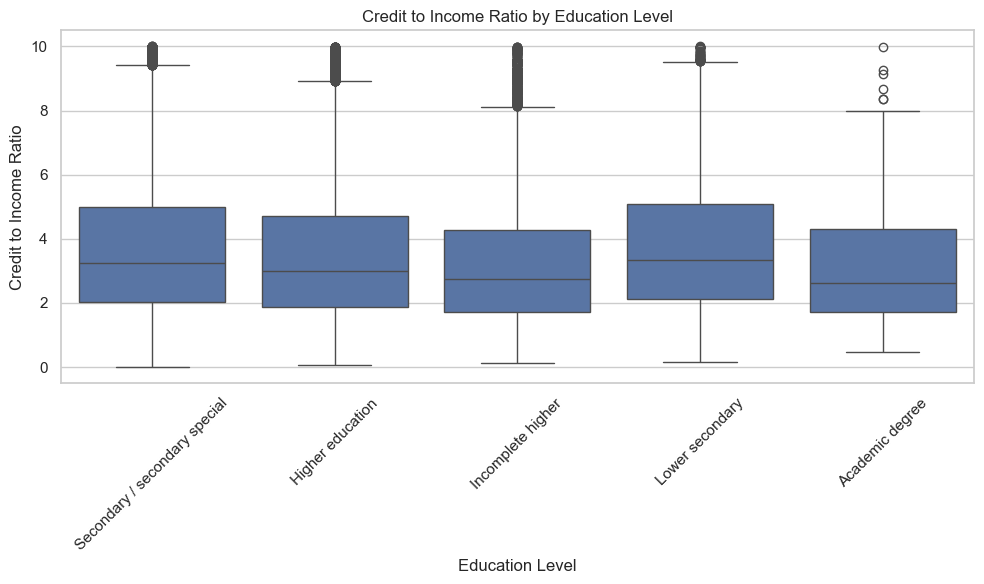

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the Credit to Income Ratio
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

# Step 2: Filter out extreme values (optional)
df_filtered = df[df['CREDIT_INCOME_RATIO'] < 10]

# Step 3: Plot distribution across education types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='NAME_EDUCATION_TYPE', y='CREDIT_INCOME_RATIO')
plt.xticks(rotation=45)
plt.title('Credit to Income Ratio by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Credit to Income Ratio')
plt.tight_layout()
plt.show()


In [ ]:
35..Question: What is the average loan amount (AMT_CREDIT) by both Family Status and Income Type?

Analytical Goal: A 2D analysis to see how different life situations and job types intersect to influence loan size (a heatmap would be good here).
Key Variables: NAME_FAMILY_STATUS, NAME_INCOME_TYPE, AMT_CREDI

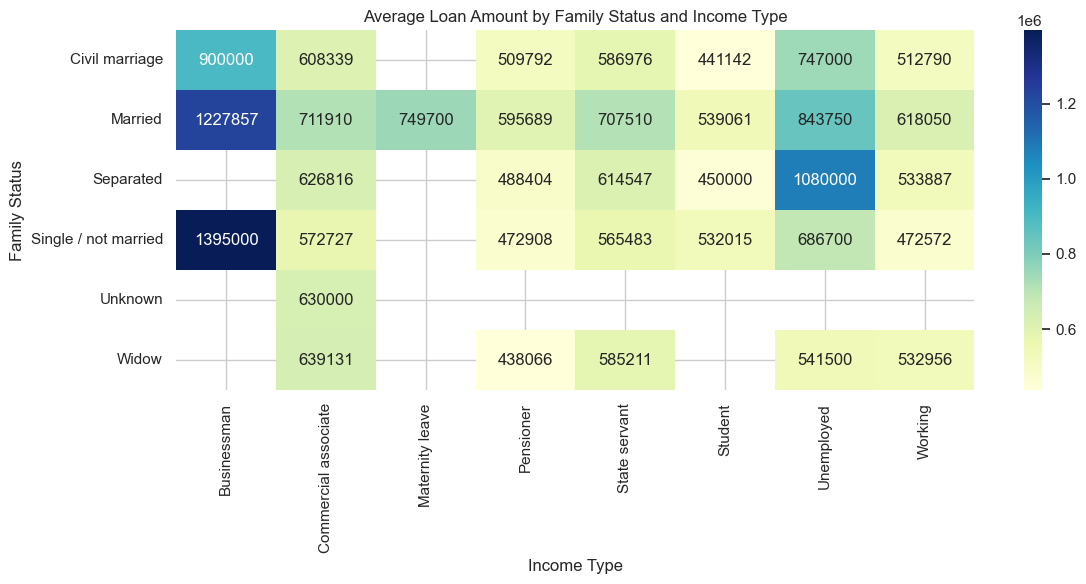

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a pivot table
pivot_table = df.pivot_table(values='AMT_CREDIT',
                             index='NAME_FAMILY_STATUS',
                             columns='NAME_INCOME_TYPE',
                             aggfunc='mean')

# Step 2: Plot as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Loan Amount by Family Status and Income Type')
plt.xlabel('Income Type')
plt.ylabel('Family Status')
plt.tight_layout()
plt.show()


In [ ]:
36..Question: What is the default rate by both Family Status and Income Type?

Analytical Goal: To pinpoint specific high-risk segments, e.g., "Unmarried" applicants in the "Maternity leave" income type.
Key Variables: NAME_FAMILY_STATUS, NAME_INCOME_TYPE, TARGET

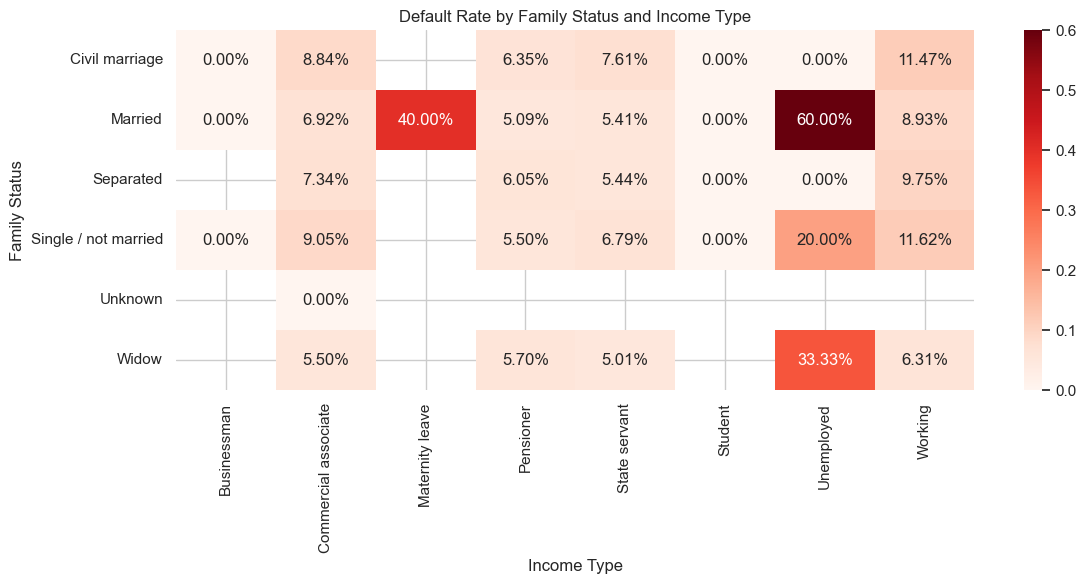

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create pivot table with default rates (TARGET mean)
pivot_table = df.pivot_table(values='TARGET',
                             index='NAME_FAMILY_STATUS',
                             columns='NAME_INCOME_TYPE',
                             aggfunc='mean')

# Step 2: Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2%", cmap='Reds')
plt.title('Default Rate by Family Status and Income Type')
plt.xlabel('Income Type')
plt.ylabel('Family Status')
plt.tight_layout()
plt.show()


In [ ]:
37..Question: In a scatter plot of Age vs. Loan Amount, are there distinct clusters for defaulters and non-defaulters?

Analytical Goal: To visually explore the interaction between age, loan size, and risk.
Key Variables: DAYS_BIRTH, AMT_CREDIT, TARGET

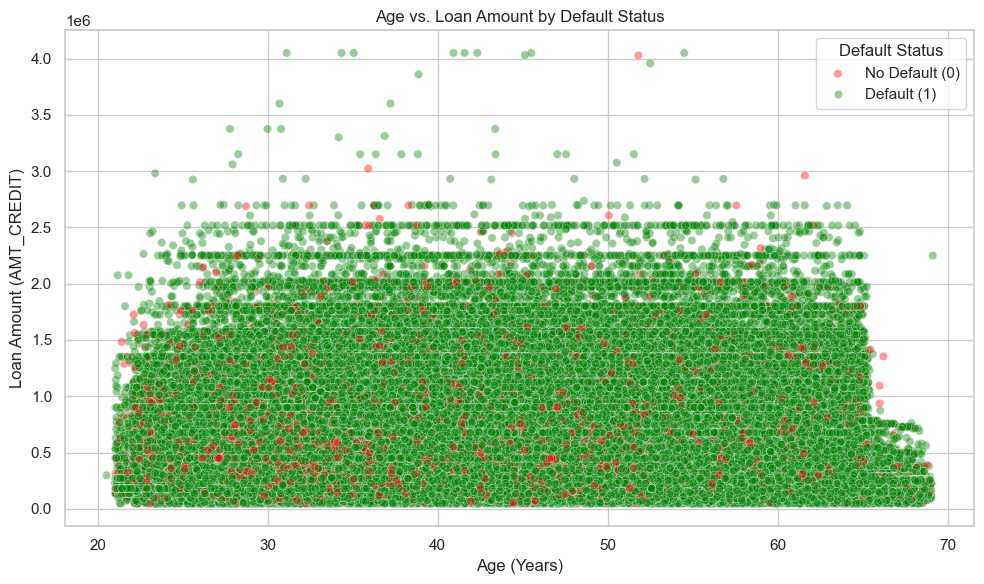

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert DAYS_BIRTH to positive age in years
df['AGE_YEARS'] = -df['DAYS_BIRTH'] / 365

# Step 2: Scatter plot with hue for default status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AGE_YEARS', y='AMT_CREDIT', hue='TARGET', alpha=0.4, palette={0: 'green', 1: 'red'})
plt.title('Age vs. Loan Amount by Default Status')
plt.xlabel('Age (Years)')
plt.ylabel('Loan Amount (AMT_CREDIT)')
plt.legend(title='Default Status', labels=['No Default (0)', 'Default (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
38..Question: For applicants who own cars, what is the age of their car (OWN_CAR_AGE) and does it correlate with default risk?

Analytical Goal: To see if the condition/age of an asset provides a signal about financial health.
Key Variables: OWN_CAR_AGE, TARGET

C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\1345372779.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_owners['CAR_AGE_BIN'] = pd.cut(df_car_owners['OWN_CAR_AGE'],
C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\1345372779.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df_car_owners.groupby('CAR_AGE_BIN')['TARGET'].mean()


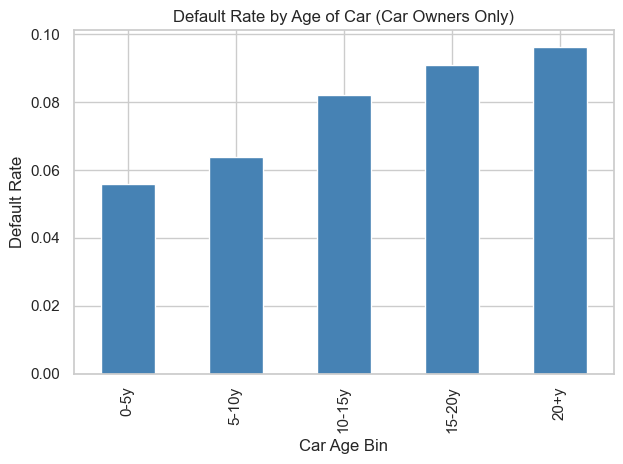

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter to only applicants who own a car and have a known car age
df_car_owners = df[df['OWN_CAR_AGE'].notnull()]

# Step 2: Bin car ages (optional, for cleaner grouping)
df_car_owners['CAR_AGE_BIN'] = pd.cut(df_car_owners['OWN_CAR_AGE'], 
                                      bins=[0, 5, 10, 15, 20, 50], 
                                      labels=['0-5y', '5-10y', '10-15y', '15-20y', '20+y'])

# Step 3: Calculate default rate by car age bin
default_rates = df_car_owners.groupby('CAR_AGE_BIN')['TARGET'].mean()

# Step 4: Plot the result
default_rates.plot(kind='bar', color='steelblue')
plt.title('Default Rate by Age of Car (Car Owners Only)')
plt.xlabel('Car Age Bin')
plt.ylabel('Default Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
39..Question: How does the distribution of EXT_SOURCE_2 look when faceted by NAME_CONTRACT_TYPE?

Analytical Goal: To see if the external scores behave differently for cash vs. revolving loans.
Key Variables: EXT_SOURCE_2, NAME_CONTRACT_TYPE

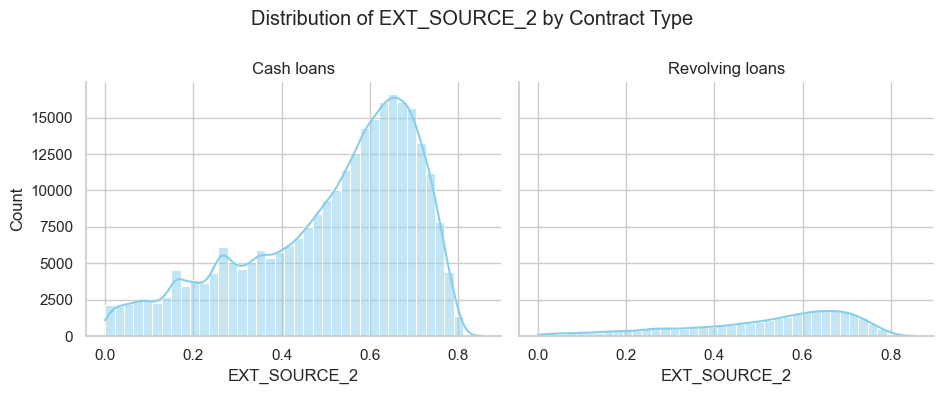

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop missing EXT_SOURCE_2 values
df_filtered = df[df['EXT_SOURCE_2'].notnull()]

# Step 2: Plot faceted distribution
g = sns.FacetGrid(df_filtered, col='NAME_CONTRACT_TYPE', height=4, aspect=1.2)
g.map(sns.histplot, 'EXT_SOURCE_2', kde=True, color='skyblue', bins=40)
g.set_axis_labels('EXT_SOURCE_2', 'Count')
g.set_titles(col_template='{col_name}')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of EXT_SOURCE_2 by Contract Type')
plt.show()


In [ ]:
40..Question: What is the relationship between the number of family members and the loan annuity (AMT_ANNUITY)?

Analytical Goal: To check if larger families opt for loans with smaller, more manageable repayment installments.
Key Variables: CNT_FAM_MEMBERS, AMT_ANNUITY

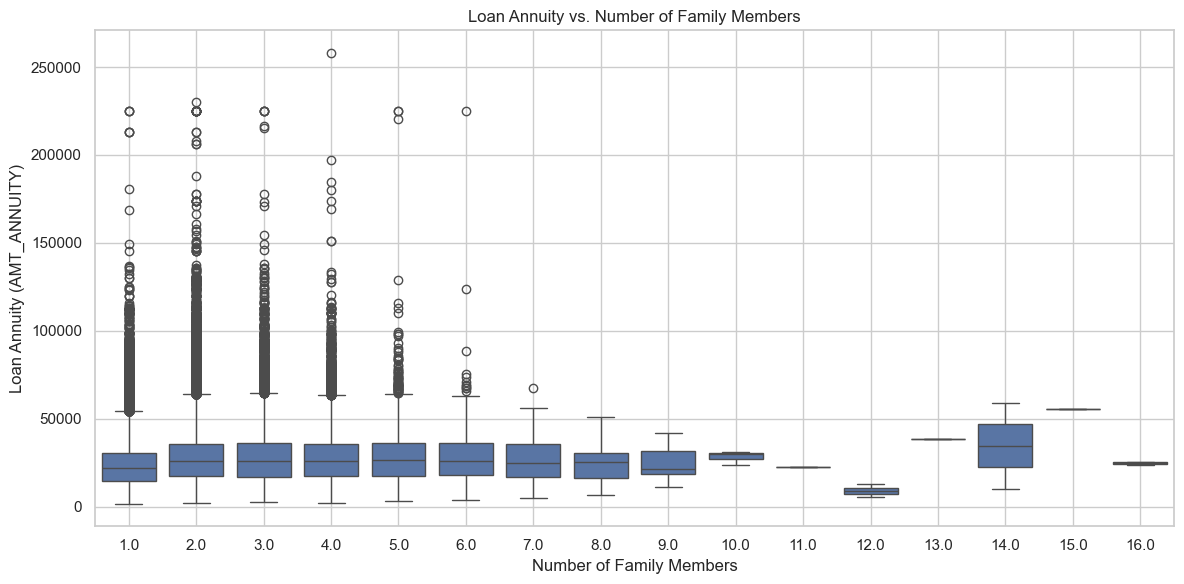

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Remove unrealistic family sizes (optional cleanup)
df_filtered = df[df['CNT_FAM_MEMBERS'] < 20]  # assuming 20+ is data error

# Step 2: Boxplot to compare annuity by family size
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='CNT_FAM_MEMBERS', y='AMT_ANNUITY')
plt.title('Loan Annuity vs. Number of Family Members')
plt.xlabel('Number of Family Members')
plt.ylabel('Loan Annuity (AMT_ANNUITY)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
41..Question (Proxy for Time): How has the average loan amount changed over the applicants' employment duration?

Analytical Goal: To see if people with longer careers apply for larger loans.
Key Variables: DAYS_EMPLOYED, AMT_CREDIT

C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\3876681841.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365
C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\3876681841.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['EMPLOYMENT_BIN'] = pd.cut(df_filtered['YEARS_EMPLOYED'],
C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\3876681841.py:17: FutureWarning: The default of observed=False is deprecated and will be changed 

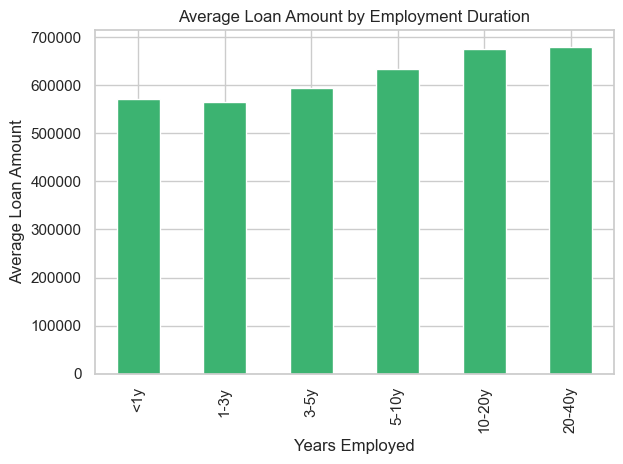

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean data – remove placeholder values
df_filtered = df[df['DAYS_EMPLOYED'] != 365243]

# Step 2: Convert to positive years of employment
df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365

# Step 3: Optional – bin years for grouping
df_filtered['EMPLOYMENT_BIN'] = pd.cut(df_filtered['YEARS_EMPLOYED'],
                                       bins=[0, 1, 3, 5, 10, 20, 40],
                                       labels=['<1y', '1-3y', '3-5y', '5-10y', '10-20y', '20-40y'])

# Step 4: Calculate average loan by bin
avg_loan_by_employment = df_filtered.groupby('EMPLOYMENT_BIN')['AMT_CREDIT'].mean()

# Step 5: Plot
avg_loan_by_employment.plot(kind='bar', color='mediumseagreen')
plt.title('Average Loan Amount by Employment Duration')
plt.xlabel('Years Employed')
plt.ylabel('Average Loan Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
42..Question (Proxy for Time): How has the average EXT_SOURCE_3 score changed over the applicants' employment duration?

Analytical Goal: To see if creditworthiness (as measured by external scores) improves with job stability.
Key Variables: DAYS_EMPLOYED, EXT_SOURCE_3

C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\1462184516.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365
C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\1462184516.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['EMPLOYMENT_BIN'] = pd.cut(df_filtered['YEARS_EMPLOYED'],
C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\1462184516.py:17: FutureWarning: The default of observed=False is deprecated and will be changed 

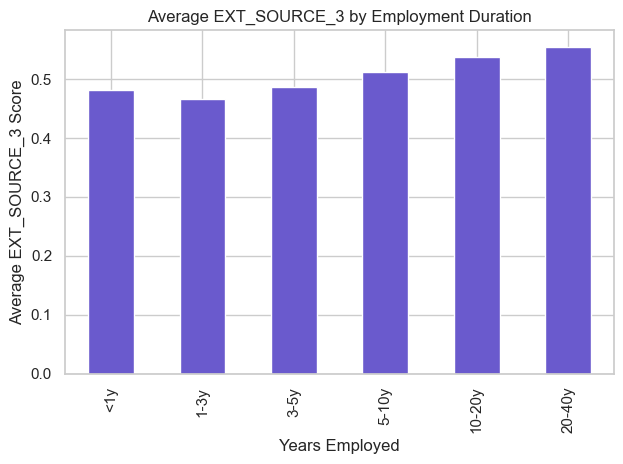

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter out invalid placeholder values
df_filtered = df[(df['DAYS_EMPLOYED'] != 365243) & (df['EXT_SOURCE_3'].notnull())]

# Step 2: Convert DAYS_EMPLOYED to positive years
df_filtered['YEARS_EMPLOYED'] = -df_filtered['DAYS_EMPLOYED'] / 365

# Step 3: Optional – bin years of employment
df_filtered['EMPLOYMENT_BIN'] = pd.cut(df_filtered['YEARS_EMPLOYED'],
                                       bins=[0, 1, 3, 5, 10, 20, 40],
                                       labels=['<1y', '1-3y', '3-5y', '5-10y', '10-20y', '20-40y'])

# Step 4: Group by bins and compute average EXT_SOURCE_3
avg_score = df_filtered.groupby('EMPLOYMENT_BIN')['EXT_SOURCE_3'].mean()

# Step 5: Plot the result
avg_score.plot(kind='bar', color='slateblue')
plt.title('Average EXT_SOURCE_3 by Employment Duration')
plt.xlabel('Years Employed')
plt.ylabel('Average EXT_SOURCE_3 Score')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
43..Question (Hypothetical Geography): If we had region/state data, which regions would have the highest default rates?

Analytical Goal: To identify geographical hotspots of risk.
Key Variables: (Hypothetical Region), TARGET

                      Total_Applications  Defaults  Default_Rate
NAME_INCOME_TYPE                                                
Maternity leave                        5         2      0.400000
Unemployed                            22         8      0.363636
Working                           158774     15224      0.095885
Commercial associate               71617      5360      0.074843
State servant                      21703      1249      0.057550
Pensioner                          55362      2982      0.053864
Businessman                           10         0      0.000000
Student                               18         0      0.000000


C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\2721448430.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




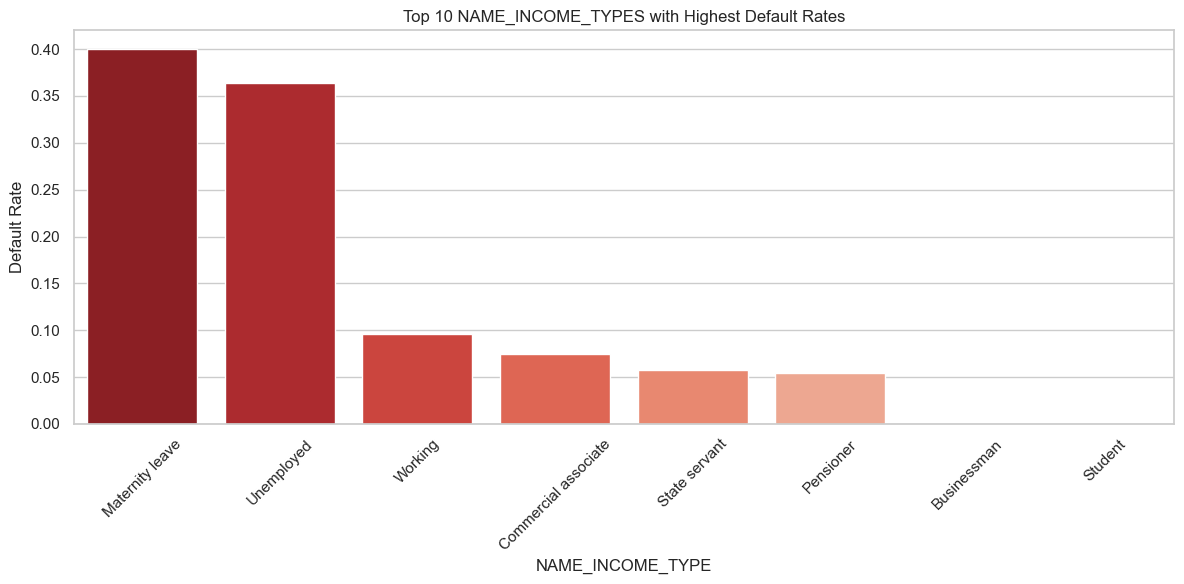

In [119]:
NAME_INCOME_TYPE_defaults = df.groupby('NAME_INCOME_TYPE')['TARGET'].agg(['count', 'sum'])
NAME_INCOME_TYPE_defaults.rename(columns={'count': 'Total_Applications', 'sum': 'Defaults'}, inplace=True)
NAME_INCOME_TYPE_defaults['Default_Rate'] = NAME_INCOME_TYPE_defaults['Defaults'] / NAME_INCOME_TYPE_defaults['Total_Applications']
NAME_INCOME_TYPE_defaults_sorted = NAME_INCOME_TYPE_defaults.sort_values(by='Default_Rate', ascending=False)
print(NAME_INCOME_TYPE_defaults_sorted.head(10))
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=NAME_INCOME_TYPE_defaults_sorted.reset_index().head(10),
            x='NAME_INCOME_TYPE', y='Default_Rate', palette='Reds_r')
plt.xticks(rotation=45)
plt.title("Top 10 NAME_INCOME_TYPES with Highest Default Rates")
plt.ylabel("Default Rate")
plt.xlabel("NAME_INCOME_TYPE")
plt.tight_layout()
plt.show()
  # Top 10 highest default rate regions

In [ ]:
44..Question (Hypothetical Geography): If we had city data, what would be the correlation between city population density and default rate?

Analytical Goal: To explore macro-economic factors related to urbanization and risk.
Key Variables: (Hypothetical City Population), TARGET

                      Default Rate  Applicant Count
NAME_INCOME_TYPE                                   
Businessman               0.000000               10
Commercial associate      0.074843            71617
Maternity leave           0.400000                5
Pensioner                 0.053864            55362
State servant             0.057550            21703
Student                   0.000000               18
Unemployed                0.363636               22
Working                   0.095885           158774


C:\Users\GARAO\AppData\Local\Temp\ipykernel_13668\527424320.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




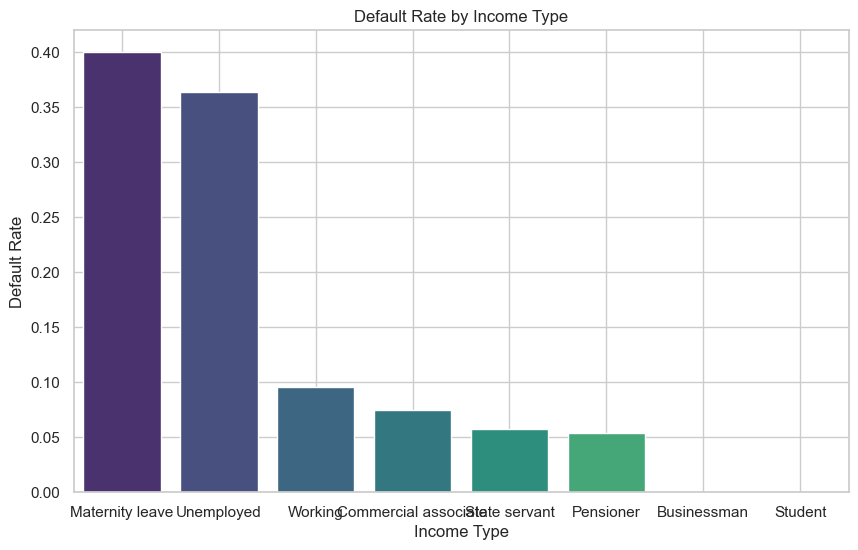

In [120]:
import pandas as pd

default_by_income = df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False)

counts = df['NAME_INCOME_TYPE'].value_counts()
summary = pd.DataFrame({
    'Default Rate': default_by_income,
    'Applicant Count': counts
})

print(summary)
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(y=default_by_income.values, x=default_by_income.index, palette='viridis')
plt.title('Default Rate by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Default Rate')
plt.grid(axis='x')
plt.show()

In [ ]:
45..Question (Combined): For working applicants, what is the default rate for different education levels?

Analytical Goal: To see if education is a risk factor even within a single, stable income type.
Key Variables: NAME_INCOME_TYPE (filtered to 'Working'), NAME_EDUCATION_TYPE, TARGET

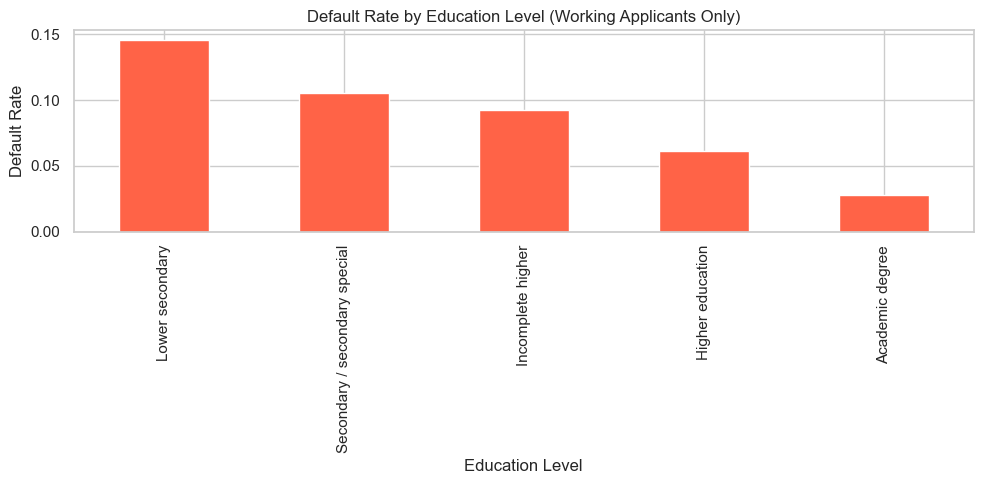

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter to only working applicants
working_df = df[df['NAME_INCOME_TYPE'] == 'Working']

# Step 2: Group by education and calculate default rate
edu_default_rate = working_df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False)

# Step 3: Plot the result
plt.figure(figsize=(10, 5))
edu_default_rate.plot(kind='bar', color='tomato')
plt.title('Default Rate by Education Level (Working Applicants Only)')
plt.xlabel('Education Level')
plt.ylabel('Default Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
46.Question (Combined): What is the average "Annuity to Income Ratio" (AMT_ANNUITY / AMT_INCOME_TOTAL) for different housing types?

Analytical Goal: To see if people with certain housing situations (e.g., renting) commit a larger portion of their income to loan repayments.
Key Variables: AMT_ANNUITY, AMT_INCOME_TOTAL, NAME_HOUSING_TYPE

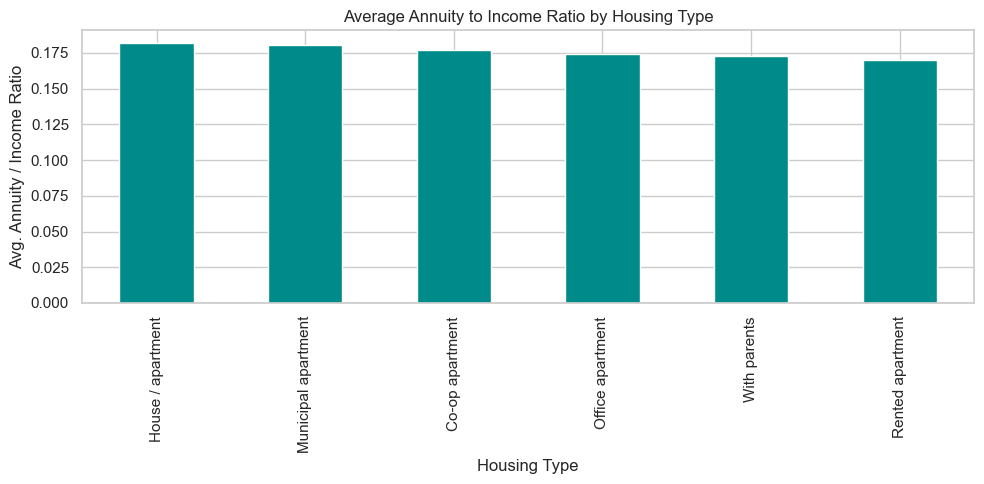

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the Annuity to Income Ratio
df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']

# Step 2: Group by housing type and calculate average ratio
housing_ratio = df.groupby('NAME_HOUSING_TYPE')['ANNUITY_INCOME_RATIO'].mean().sort_values(ascending=False)

# Step 3: Plot the result
plt.figure(figsize=(10, 5))
housing_ratio.plot(kind='bar', color='darkcyan')
plt.title('Average Annuity to Income Ratio by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Avg. Annuity / Income Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
47..Question (Distribution): What is the distribution of the "Annuity to Credit Ratio" (AMT_ANNUITY / AMT_CREDIT)?

Analytical Goal: This ratio is related to the interest rate and loan term. Understanding its distribution can reveal patterns in loan products.
Key Variables: AMT_ANNUITY, AMT_CREDIT

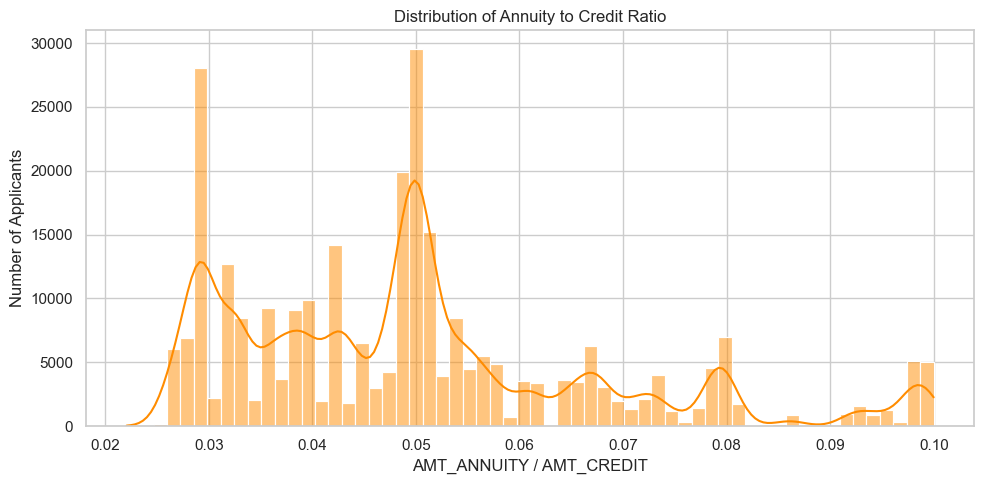

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the Annuity to Credit Ratio
df['ANNUITY_CREDIT_RATIO'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

# Step 2: Filter out extreme values (optional but useful)
df_filtered = df[(df['ANNUITY_CREDIT_RATIO'] > 0) & (df['ANNUITY_CREDIT_RATIO'] < 0.1)]

# Step 3: Plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['ANNUITY_CREDIT_RATIO'], bins=60, kde=True, color='darkorange')
plt.title('Distribution of Annuity to Credit Ratio')
plt.xlabel('AMT_ANNUITY / AMT_CREDIT')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
48..Question (Interaction): How does the default rate change with EXT_SOURCE_1 for different loan types?

Analytical Goal: To see if the predictive power of an external score is consistent across different products.
Key Variables: EXT_SOURCE_1, NAME_CONTRACT_TYPE, TARGET

C:\Users\GARAO\AppData\Local\Temp\ipykernel_14560\113314148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EXT_BIN'] = pd.qcut(df['EXT_SOURCE_1'], q=10, duplicates='drop')
C:\Users\GARAO\AppData\Local\Temp\ipykernel_14560\113314148.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['EXT_BIN', 'NAME_CONTRACT_TYPE'])['TARGET'].mean().reset_index()


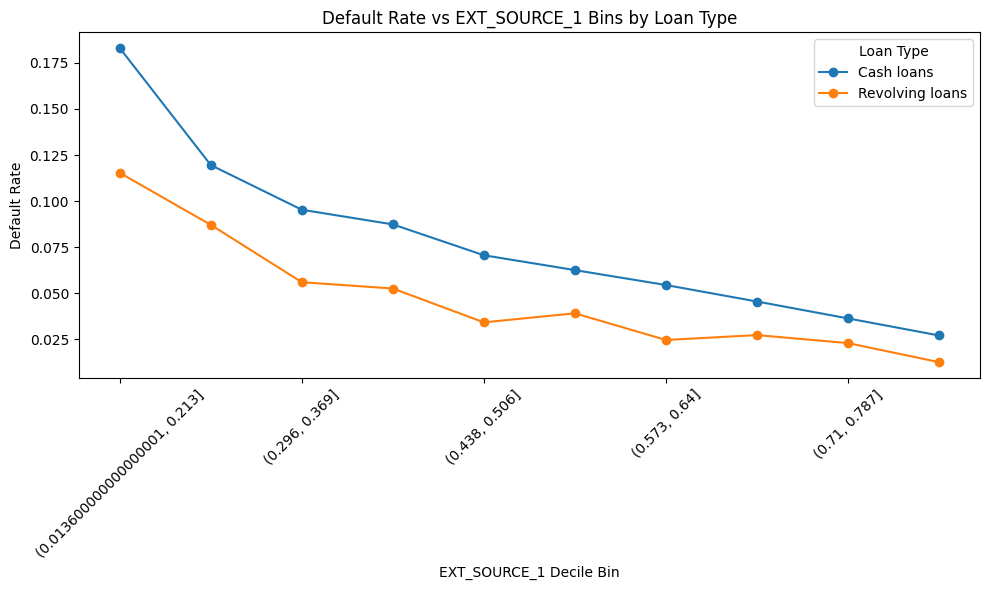

In [21]:
df = df[df['EXT_SOURCE_1'].notna() & df['NAME_CONTRACT_TYPE'].notna()]


df['EXT_BIN'] = pd.qcut(df['EXT_SOURCE_1'], q=10, duplicates='drop')


grouped = df.groupby(['EXT_BIN', 'NAME_CONTRACT_TYPE'])['TARGET'].mean().reset_index()

pivot_df = grouped.pivot(index='EXT_BIN', columns='NAME_CONTRACT_TYPE', values='TARGET')

pivot_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Default Rate vs EXT_SOURCE_1 Bins by Loan Type')
plt.xlabel('EXT_SOURCE_1 Decile Bin')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.legend(title='Loan Type')
plt.tight_layout()
plt.show()

In [ ]:
49...Question (Deep Dive): For the highest risk ORGANIZATION_TYPE, what is the age and income distribution of its applicants?

Analytical Goal: To create a detailed profile of the riskiest customer segments.
Key Variables: ORGANIZATION_TYPE, DAYS_BIRTH, AMT_INCOME_TOTAL

Riskiest Organization Type: Transport: type 3


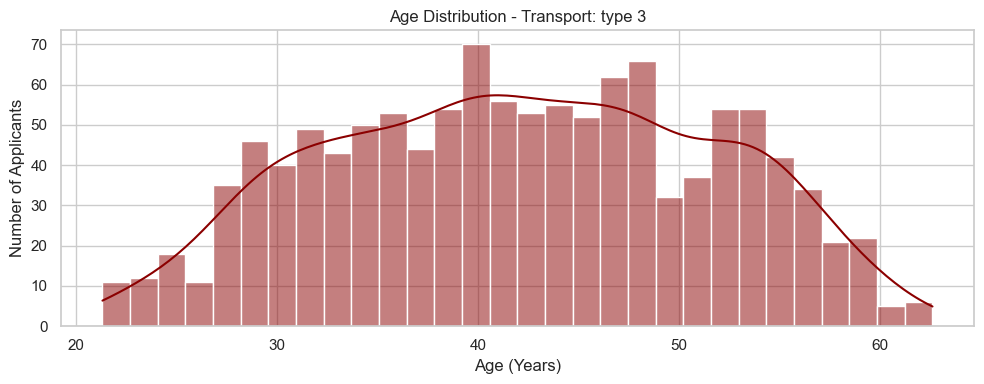

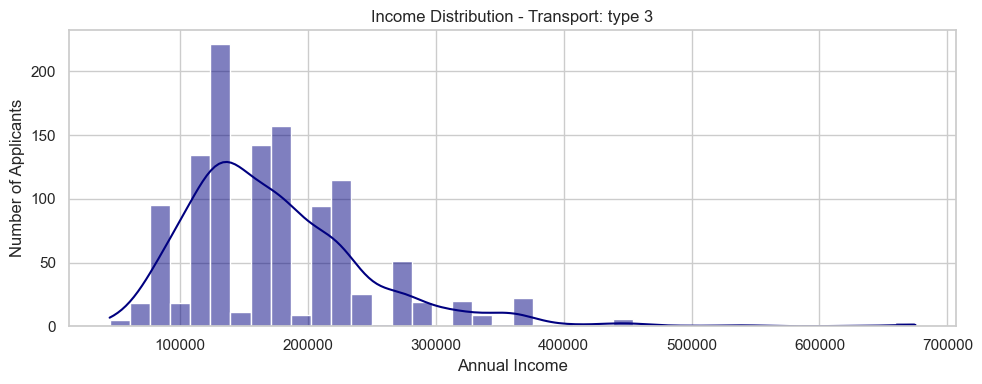

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Find the riskiest organization type
org_default_rates = df.groupby('ORGANIZATION_TYPE')['TARGET'].mean().sort_values(ascending=False)
riskiest_org = org_default_rates.idxmax()
print(f"Riskiest Organization Type: {riskiest_org}")

# Step 2: Filter data for that organization
df_risky = df[df['ORGANIZATION_TYPE'] == riskiest_org].copy()

# Step 3: Add age in years
df_risky['AGE_YEARS'] = -df_risky['DAYS_BIRTH'] / 365

# Step 4: Plot age distribution
plt.figure(figsize=(10, 4))
sns.histplot(df_risky['AGE_YEARS'], bins=30, kde=True, color='darkred')
plt.title(f'Age Distribution - {riskiest_org}')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Plot income distribution
plt.figure(figsize=(10, 4))
sns.histplot(df_risky['AMT_INCOME_TOTAL'], bins=40, kde=True, color='navy')
plt.title(f'Income Distribution - {riskiest_org}')
plt.xlabel('Annual Income')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
50...Question (Final Sanity Check): In a parallel categories plot, can we visualize the flow of applicants from NAME_INCOME_TYPE to NAME_EDUCATION_TYPE to the final TARGET status?

Analytical Goal: To get a holistic, visual summary of the relationships between the most important categorical variables and the final outcome.
Key Variables: NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, TARGET

In [113]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


C:\Users\GARAO\AppData\Local\Temp\ipykernel_14560\3530790919.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risky_df['AGE'] = -risky_df['DAYS_BIRTH'] / 365


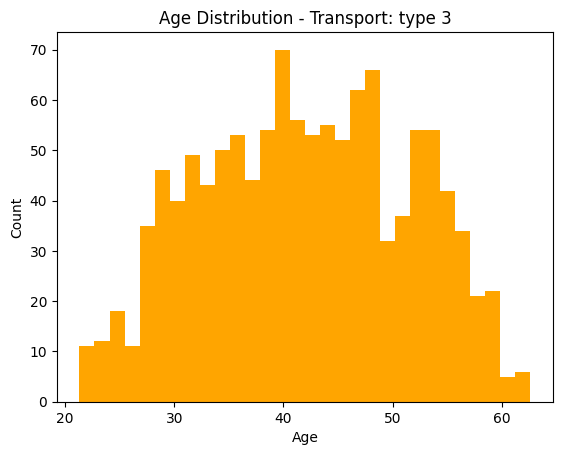

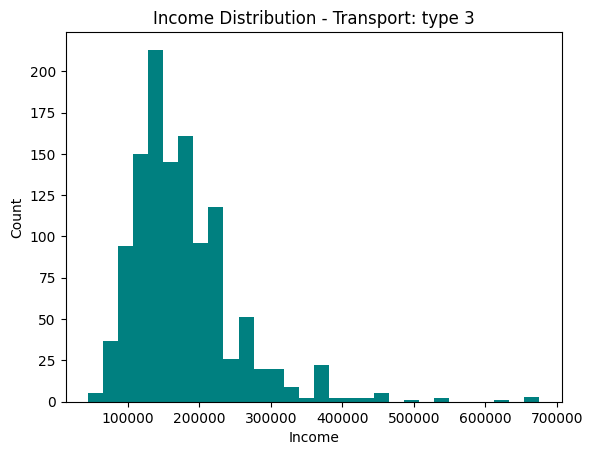

In [14]:
df = df[['ORGANIZATION_TYPE', 'TARGET', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL']].dropna()


riskiest_org = df.groupby('ORGANIZATION_TYPE')['TARGET'].mean().idxmax()

risky_df = df[df['ORGANIZATION_TYPE'] == riskiest_org]

risky_df['AGE'] = -risky_df['DAYS_BIRTH'] / 365

plt.hist(risky_df['AGE'], bins=30, color='orange')
plt.title(f'Age Distribution - {riskiest_org}')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.hist(risky_df['AMT_INCOME_TOTAL'], bins=30, color='teal')
plt.title(f'Income Distribution - {riskiest_org}')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [114]:
!pip install nbformat


In [115]:
import plotly.express as px